In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_25284\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The  Dataset



## [Source]()

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "radiopaedia.org"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,9


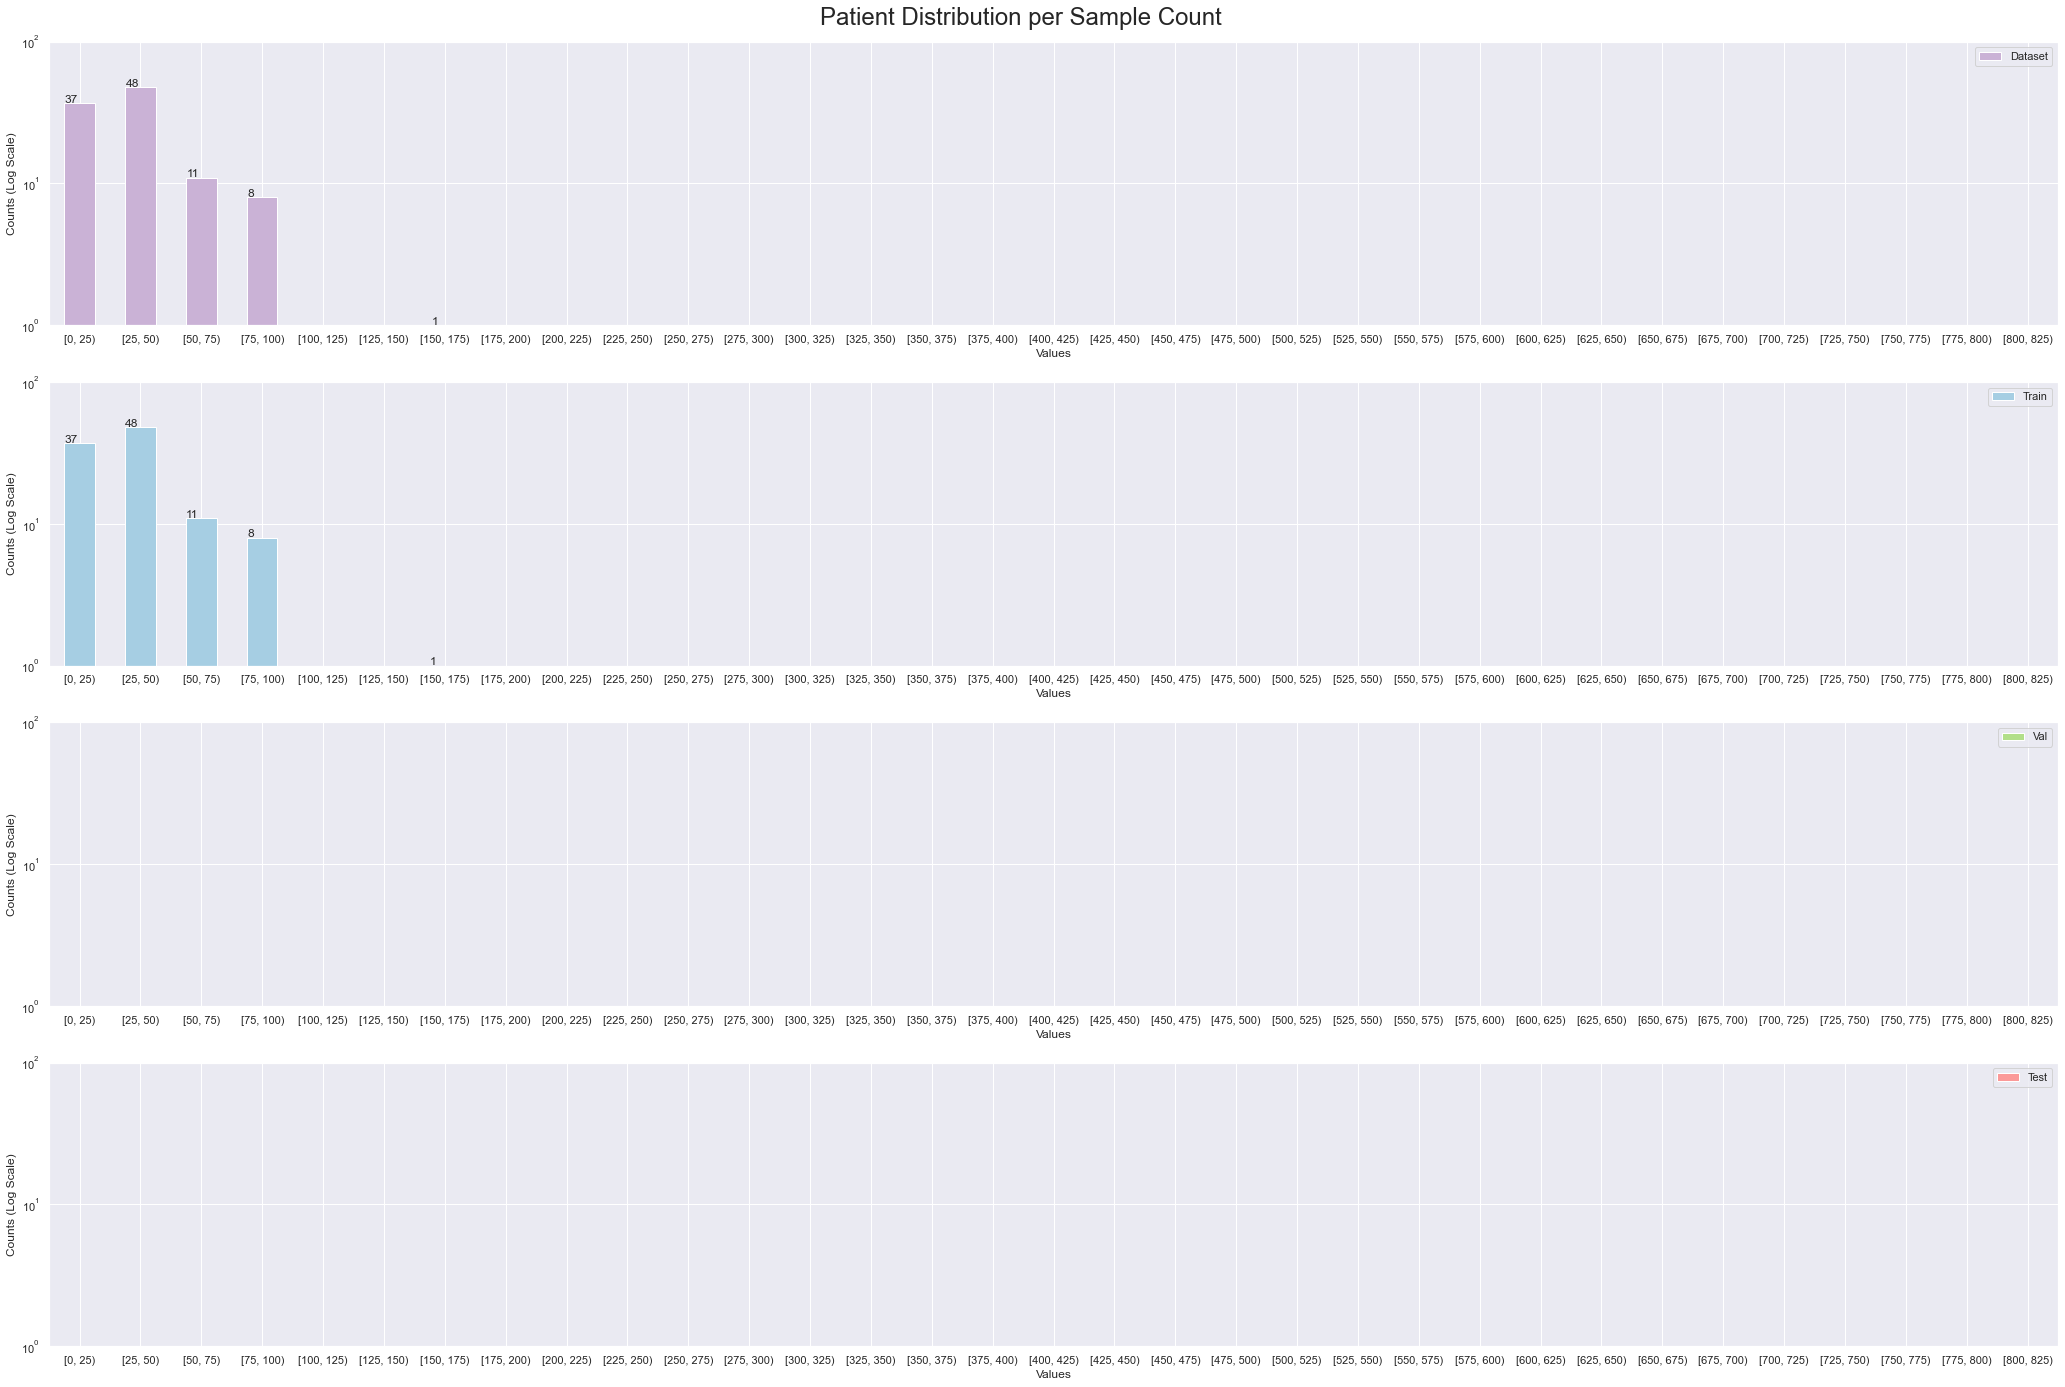

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",37,37,0,0
"[25, 50)",48,48,0,0
"[50, 75)",11,11,0,0
"[75, 100)",8,8,0,0
"[100, 125)",0,0,0,0
"[125, 150)",0,0,0,0
"[150, 175)",1,1,0,0
"[175, 200)",0,0,0,0
"[200, 225)",0,0,0,0


# Plots

## Class

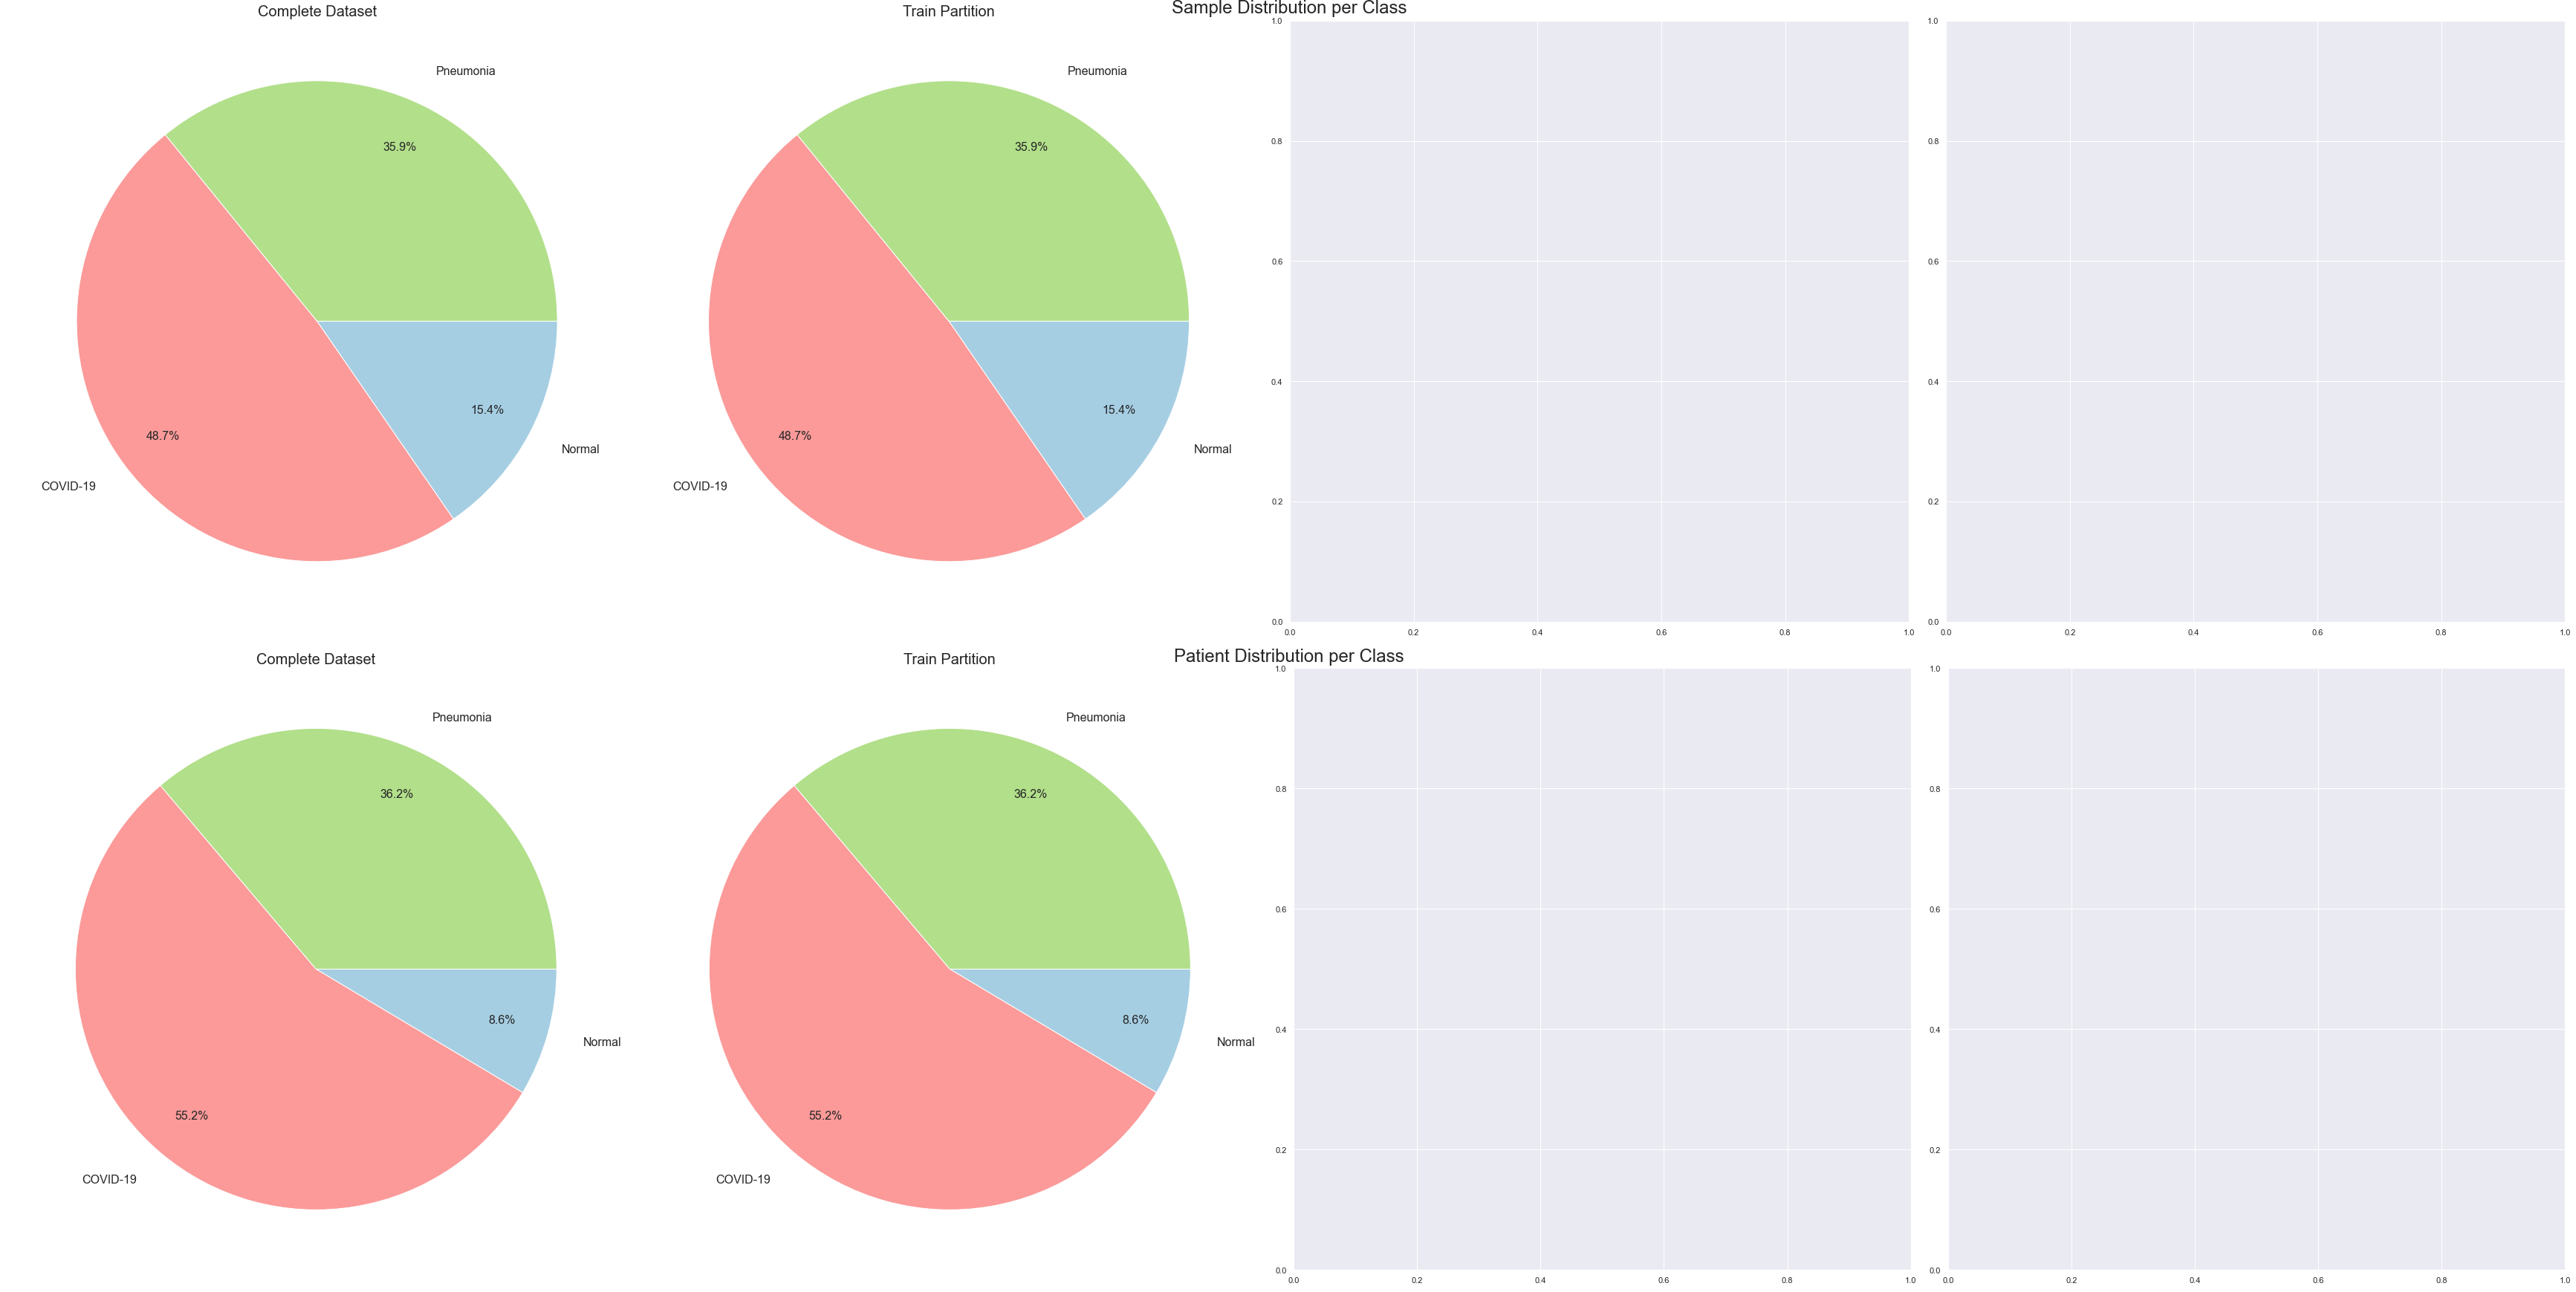

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,1742,1742,0,0
Normal,550,550,0,0
Pneumonia,1282,1282,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
COVID-19,58,58,0,0
Pneumonia,38,38,0,0
Normal,9,9,0,0


## Age

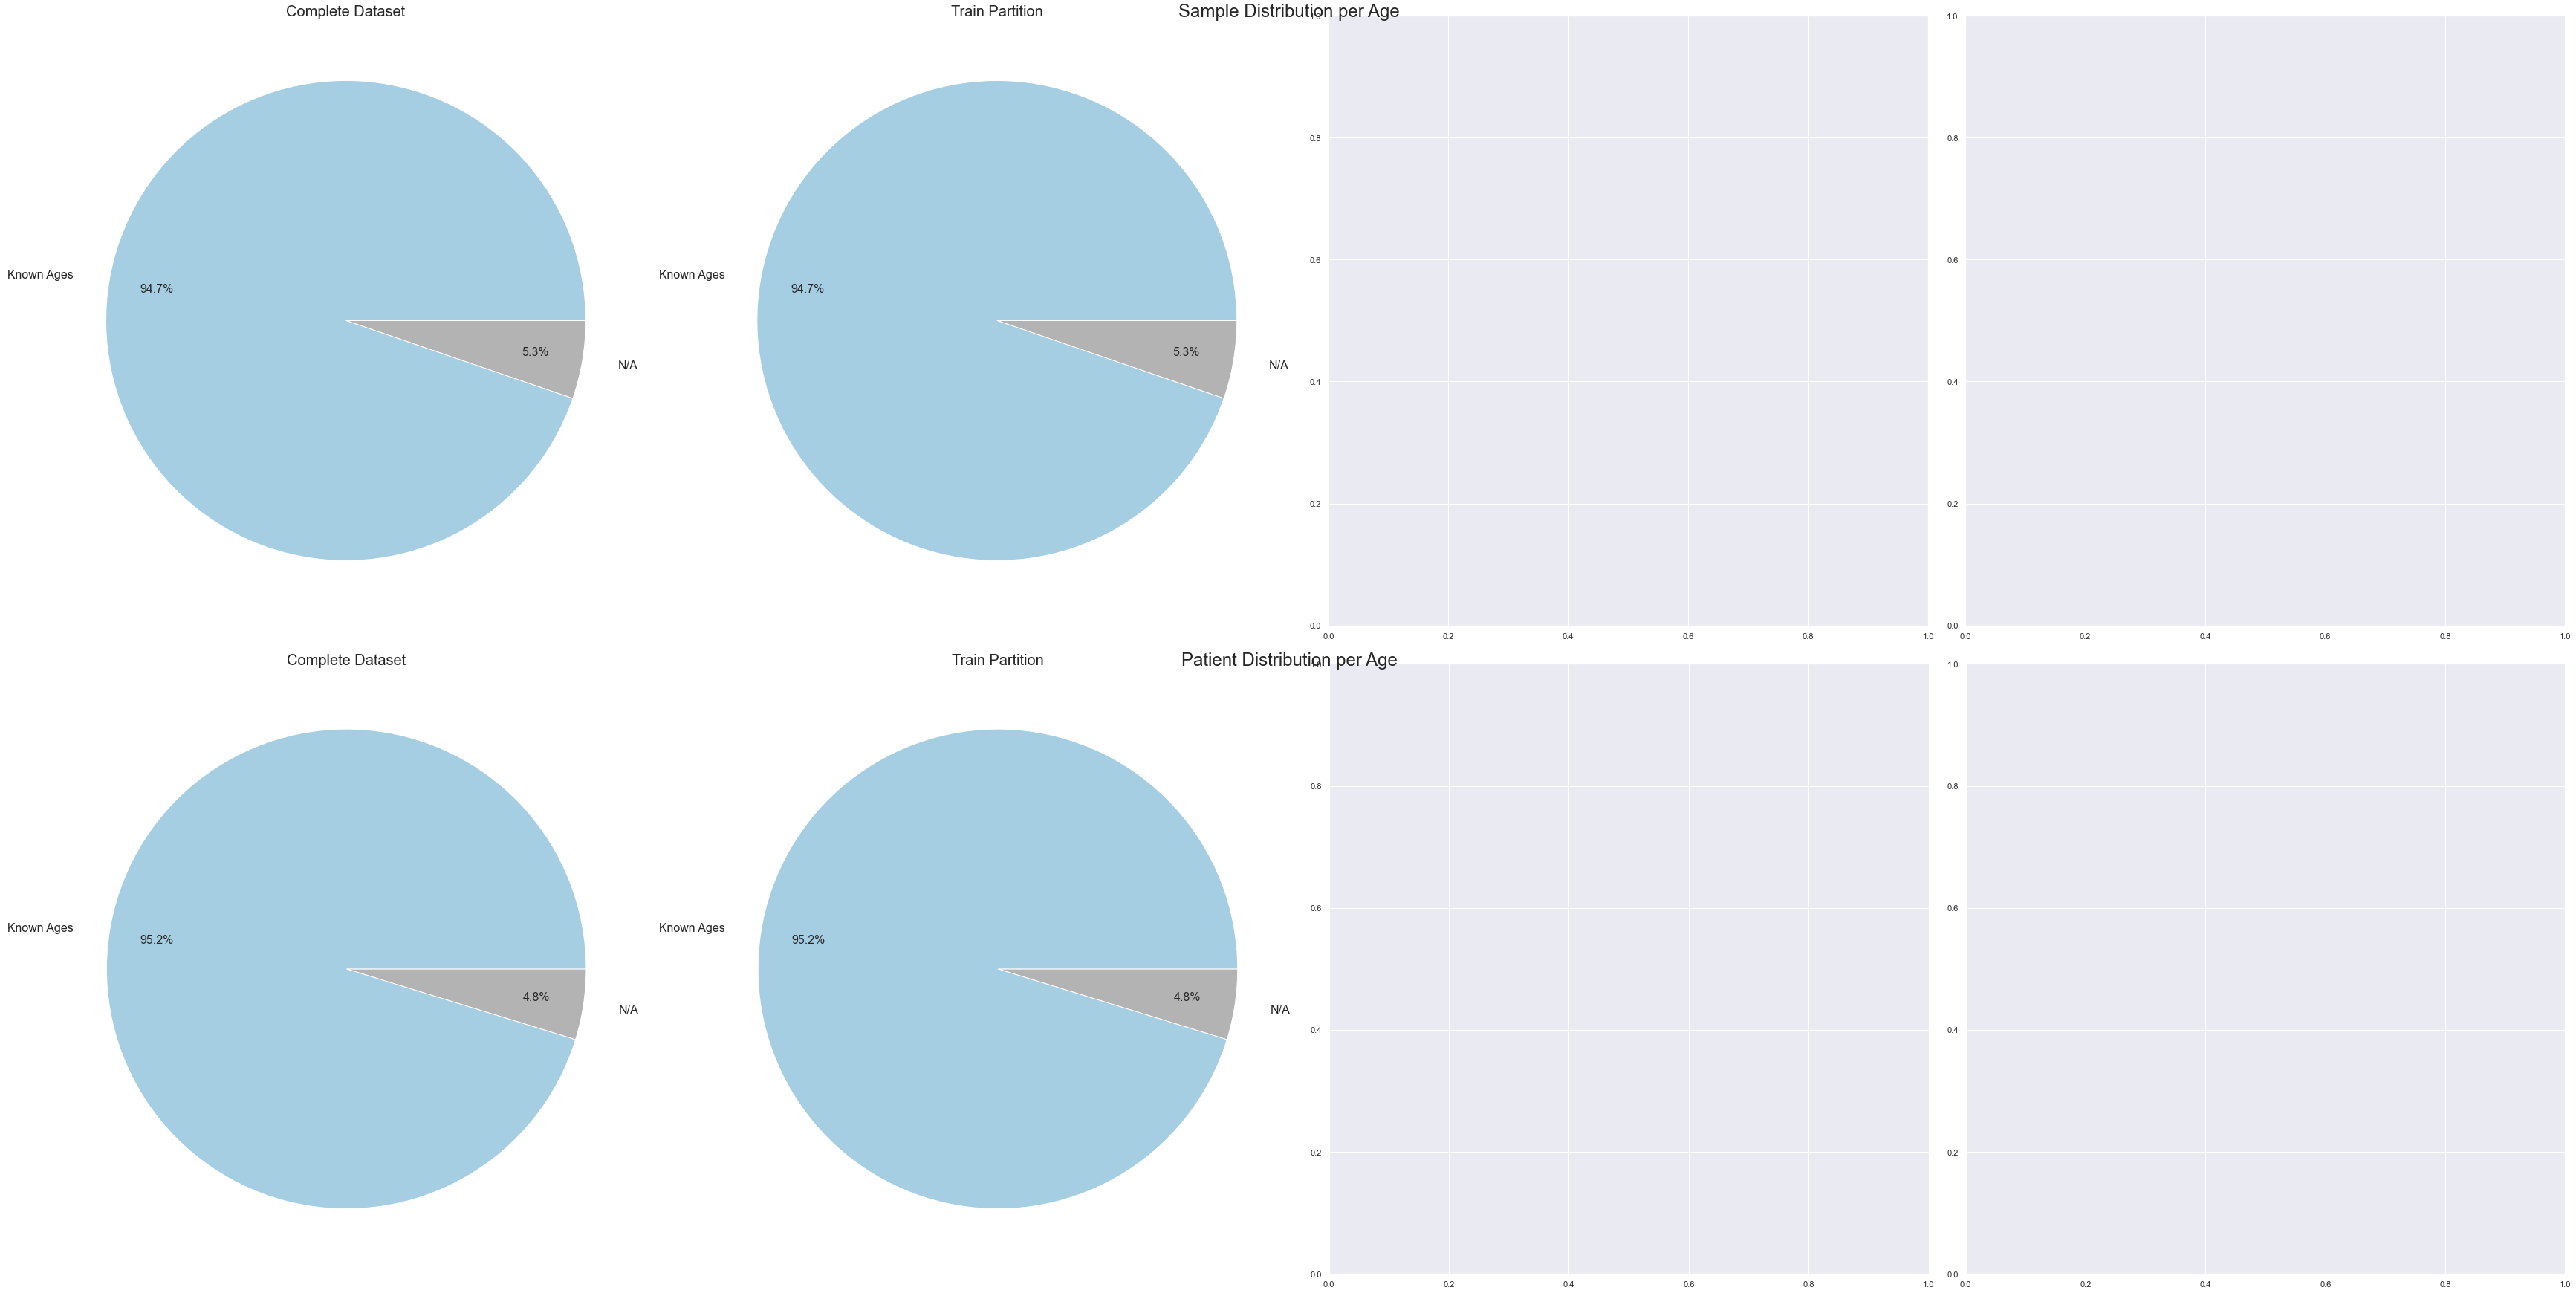

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,188,188,0,0
Known Ages,3386,3386,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,5,5,0,0
Known Ages,100,100,0,0
SUM,105,105,0,0


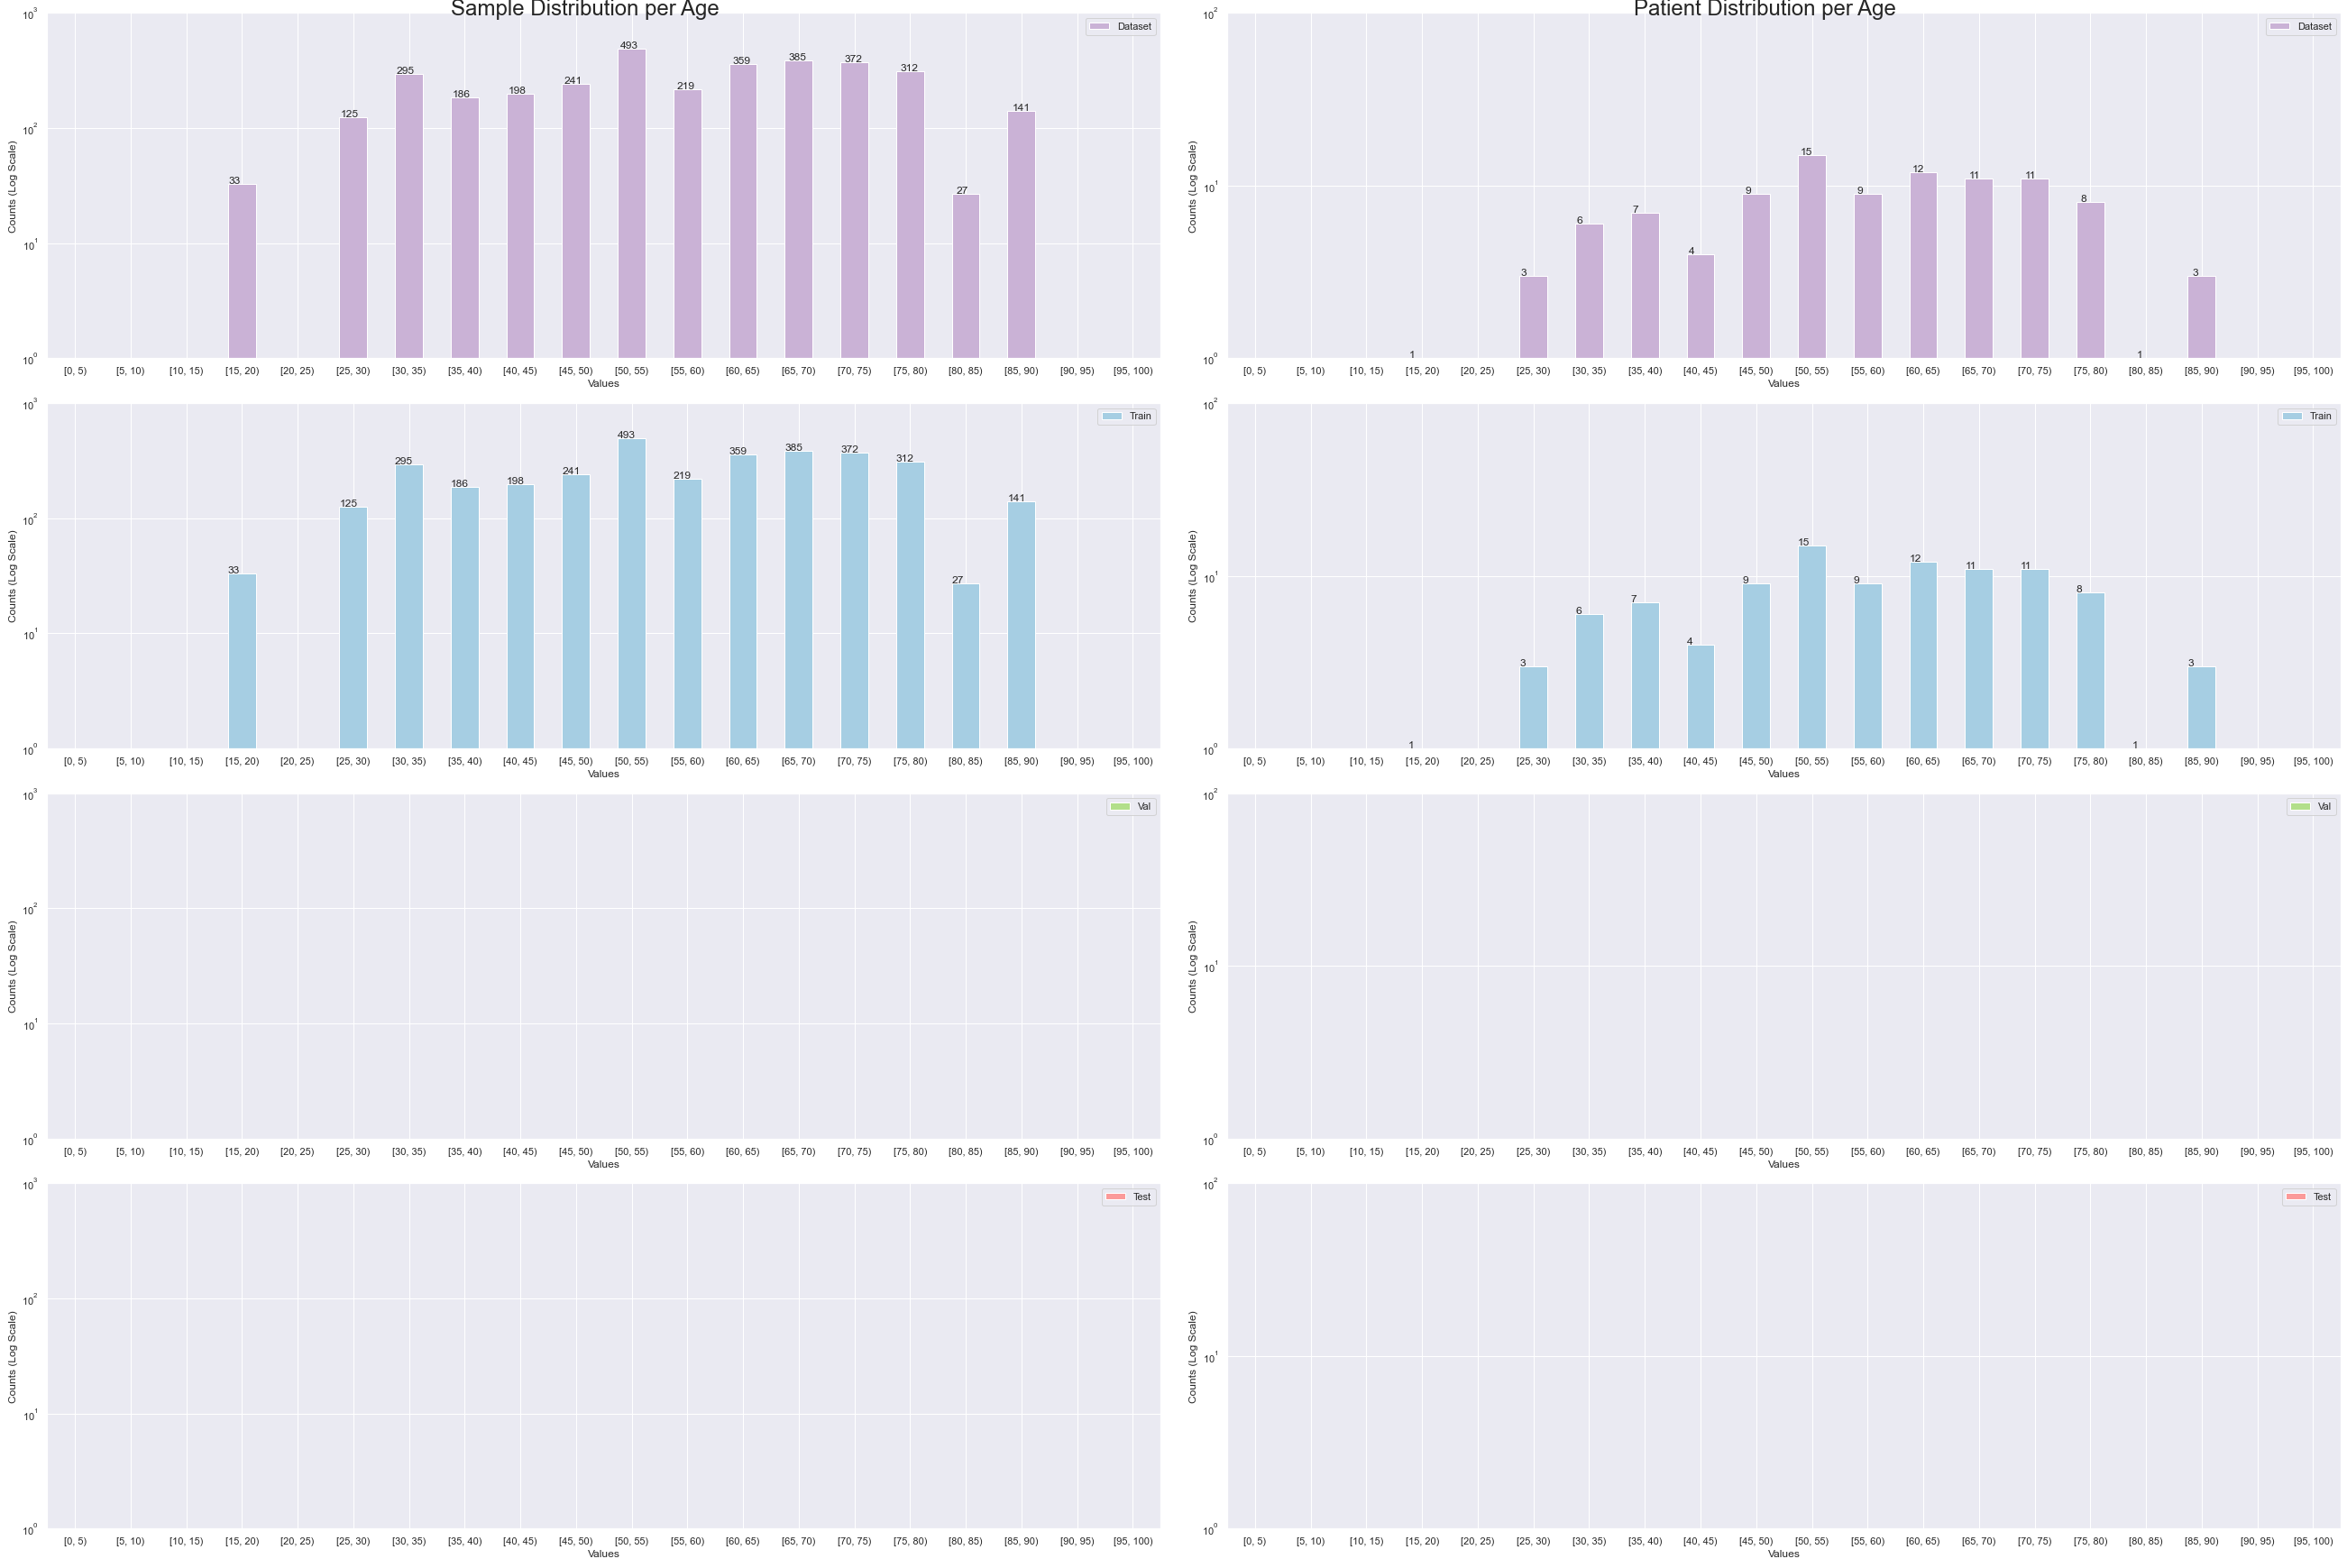

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",0,0,0,0
"[10, 15)",0,0,0,0
"[15, 20)",33,33,0,0
"[20, 25)",0,0,0,0
"[25, 30)",125,125,0,0
"[30, 35)",295,295,0,0
"[35, 40)",186,186,0,0
"[40, 45)",198,198,0,0


## Sex

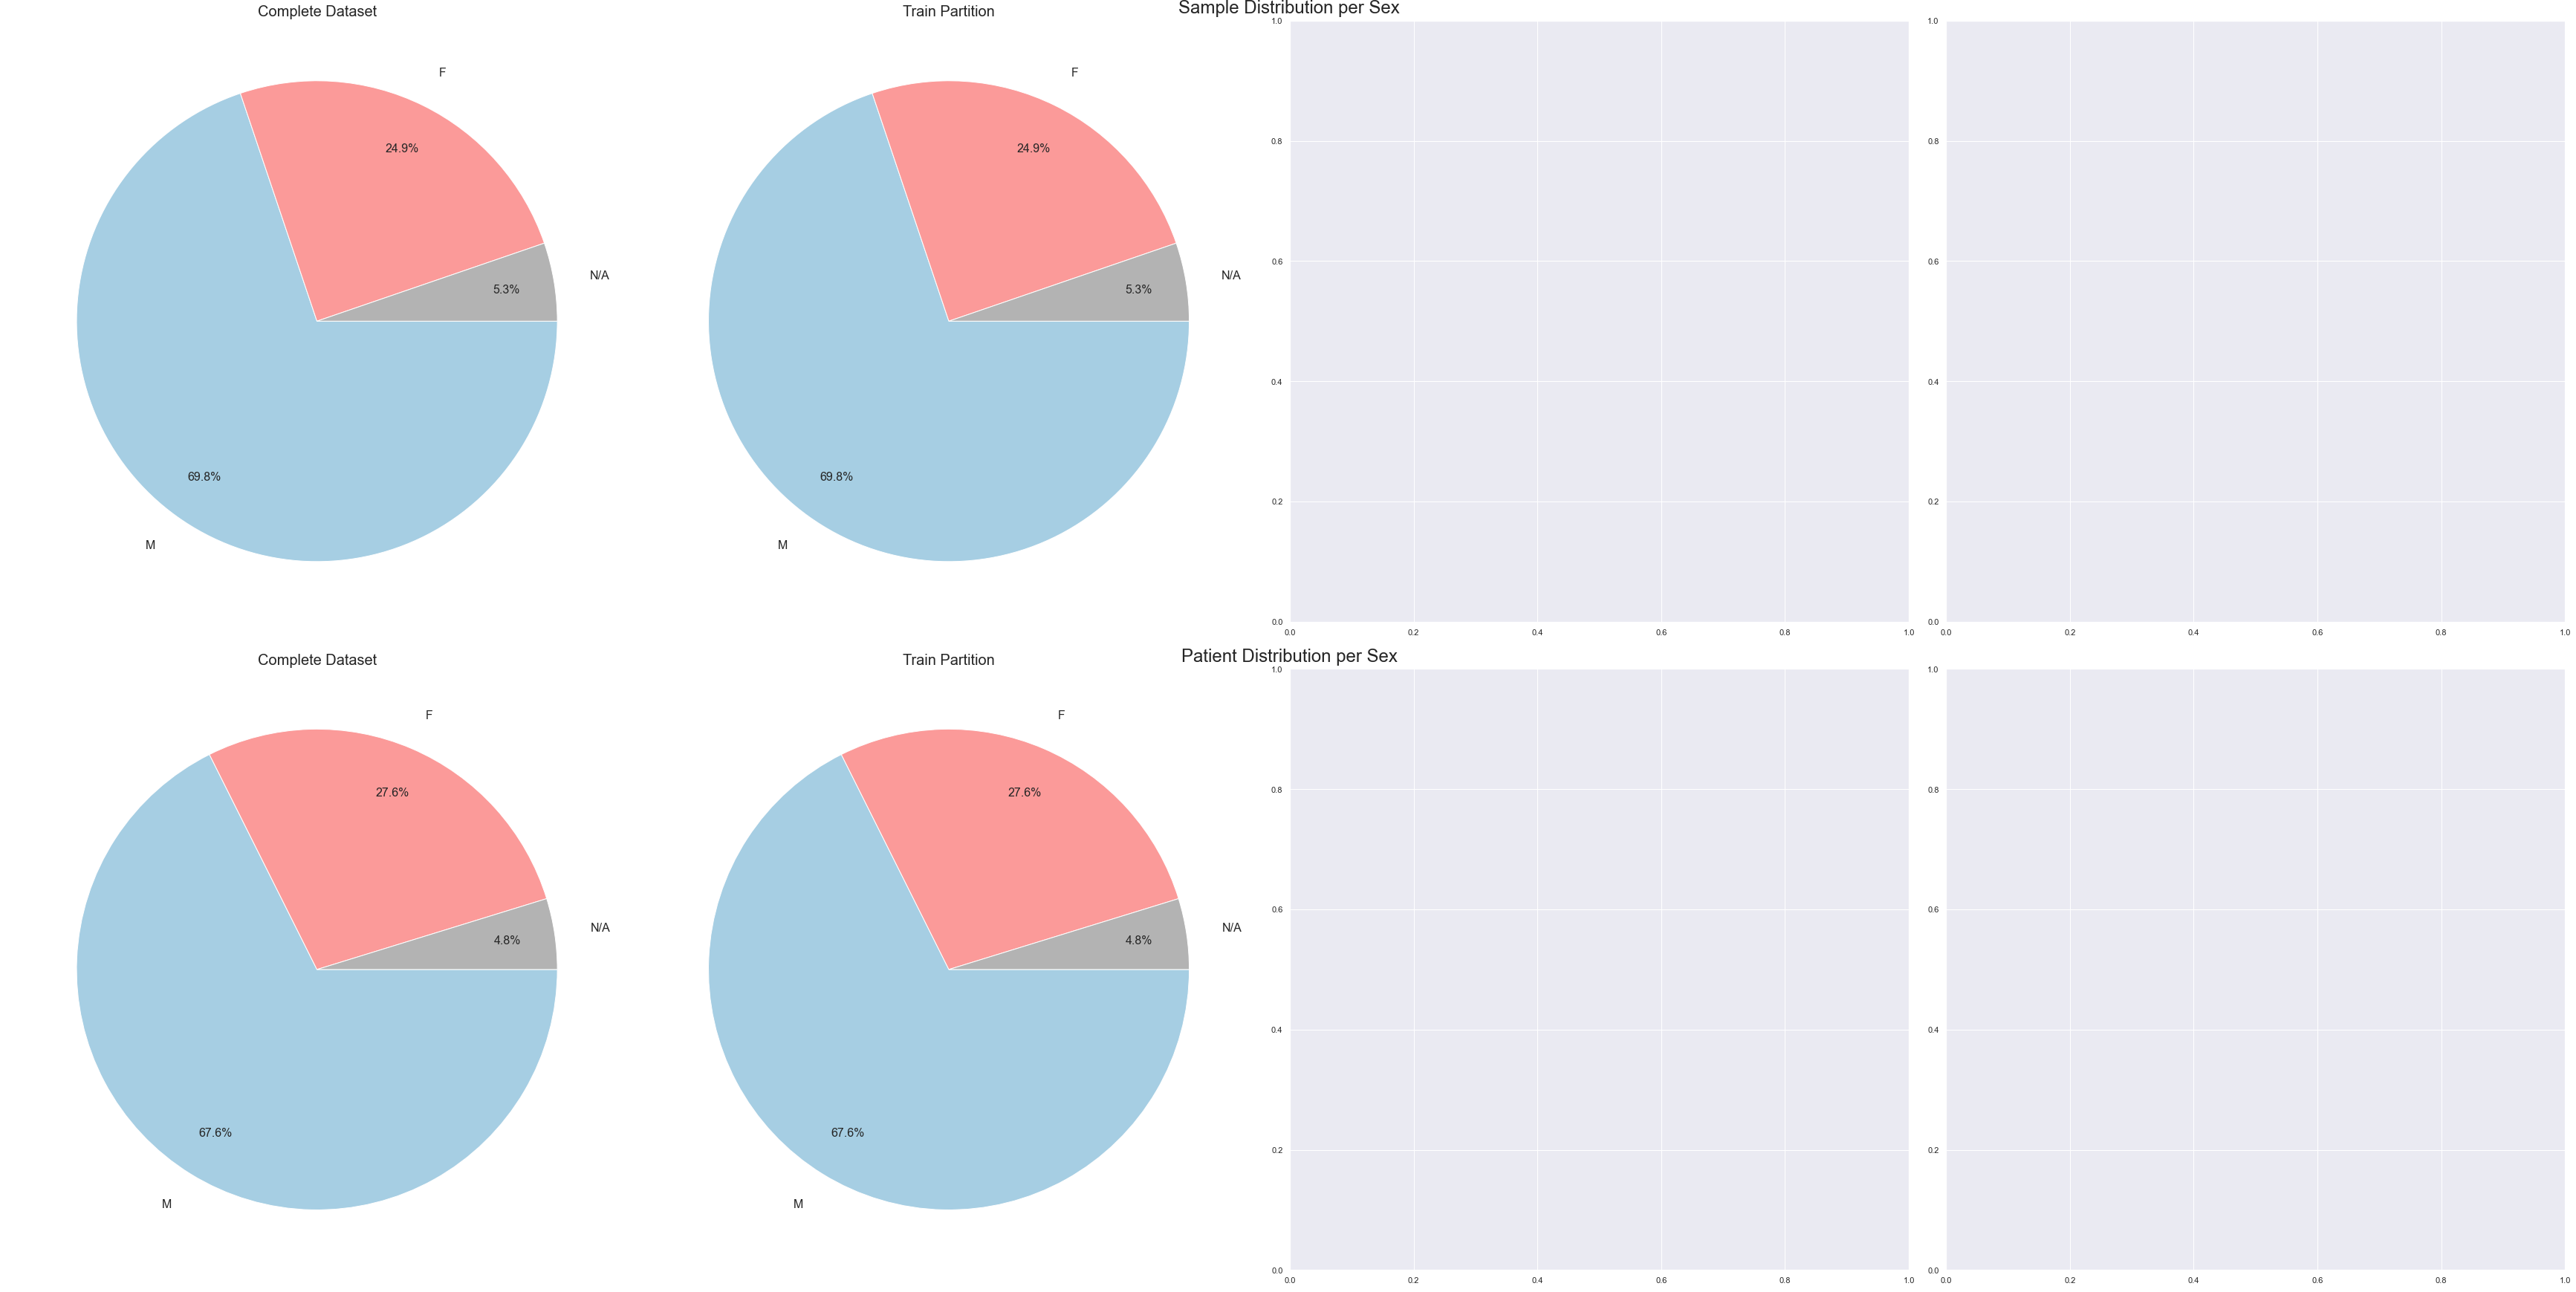

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
M,2496,2496,0,0
N/A,188,188,0,0
F,890,890,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,5,5,0,0
M,71,71,0,0
F,29,29,0,0


## Country

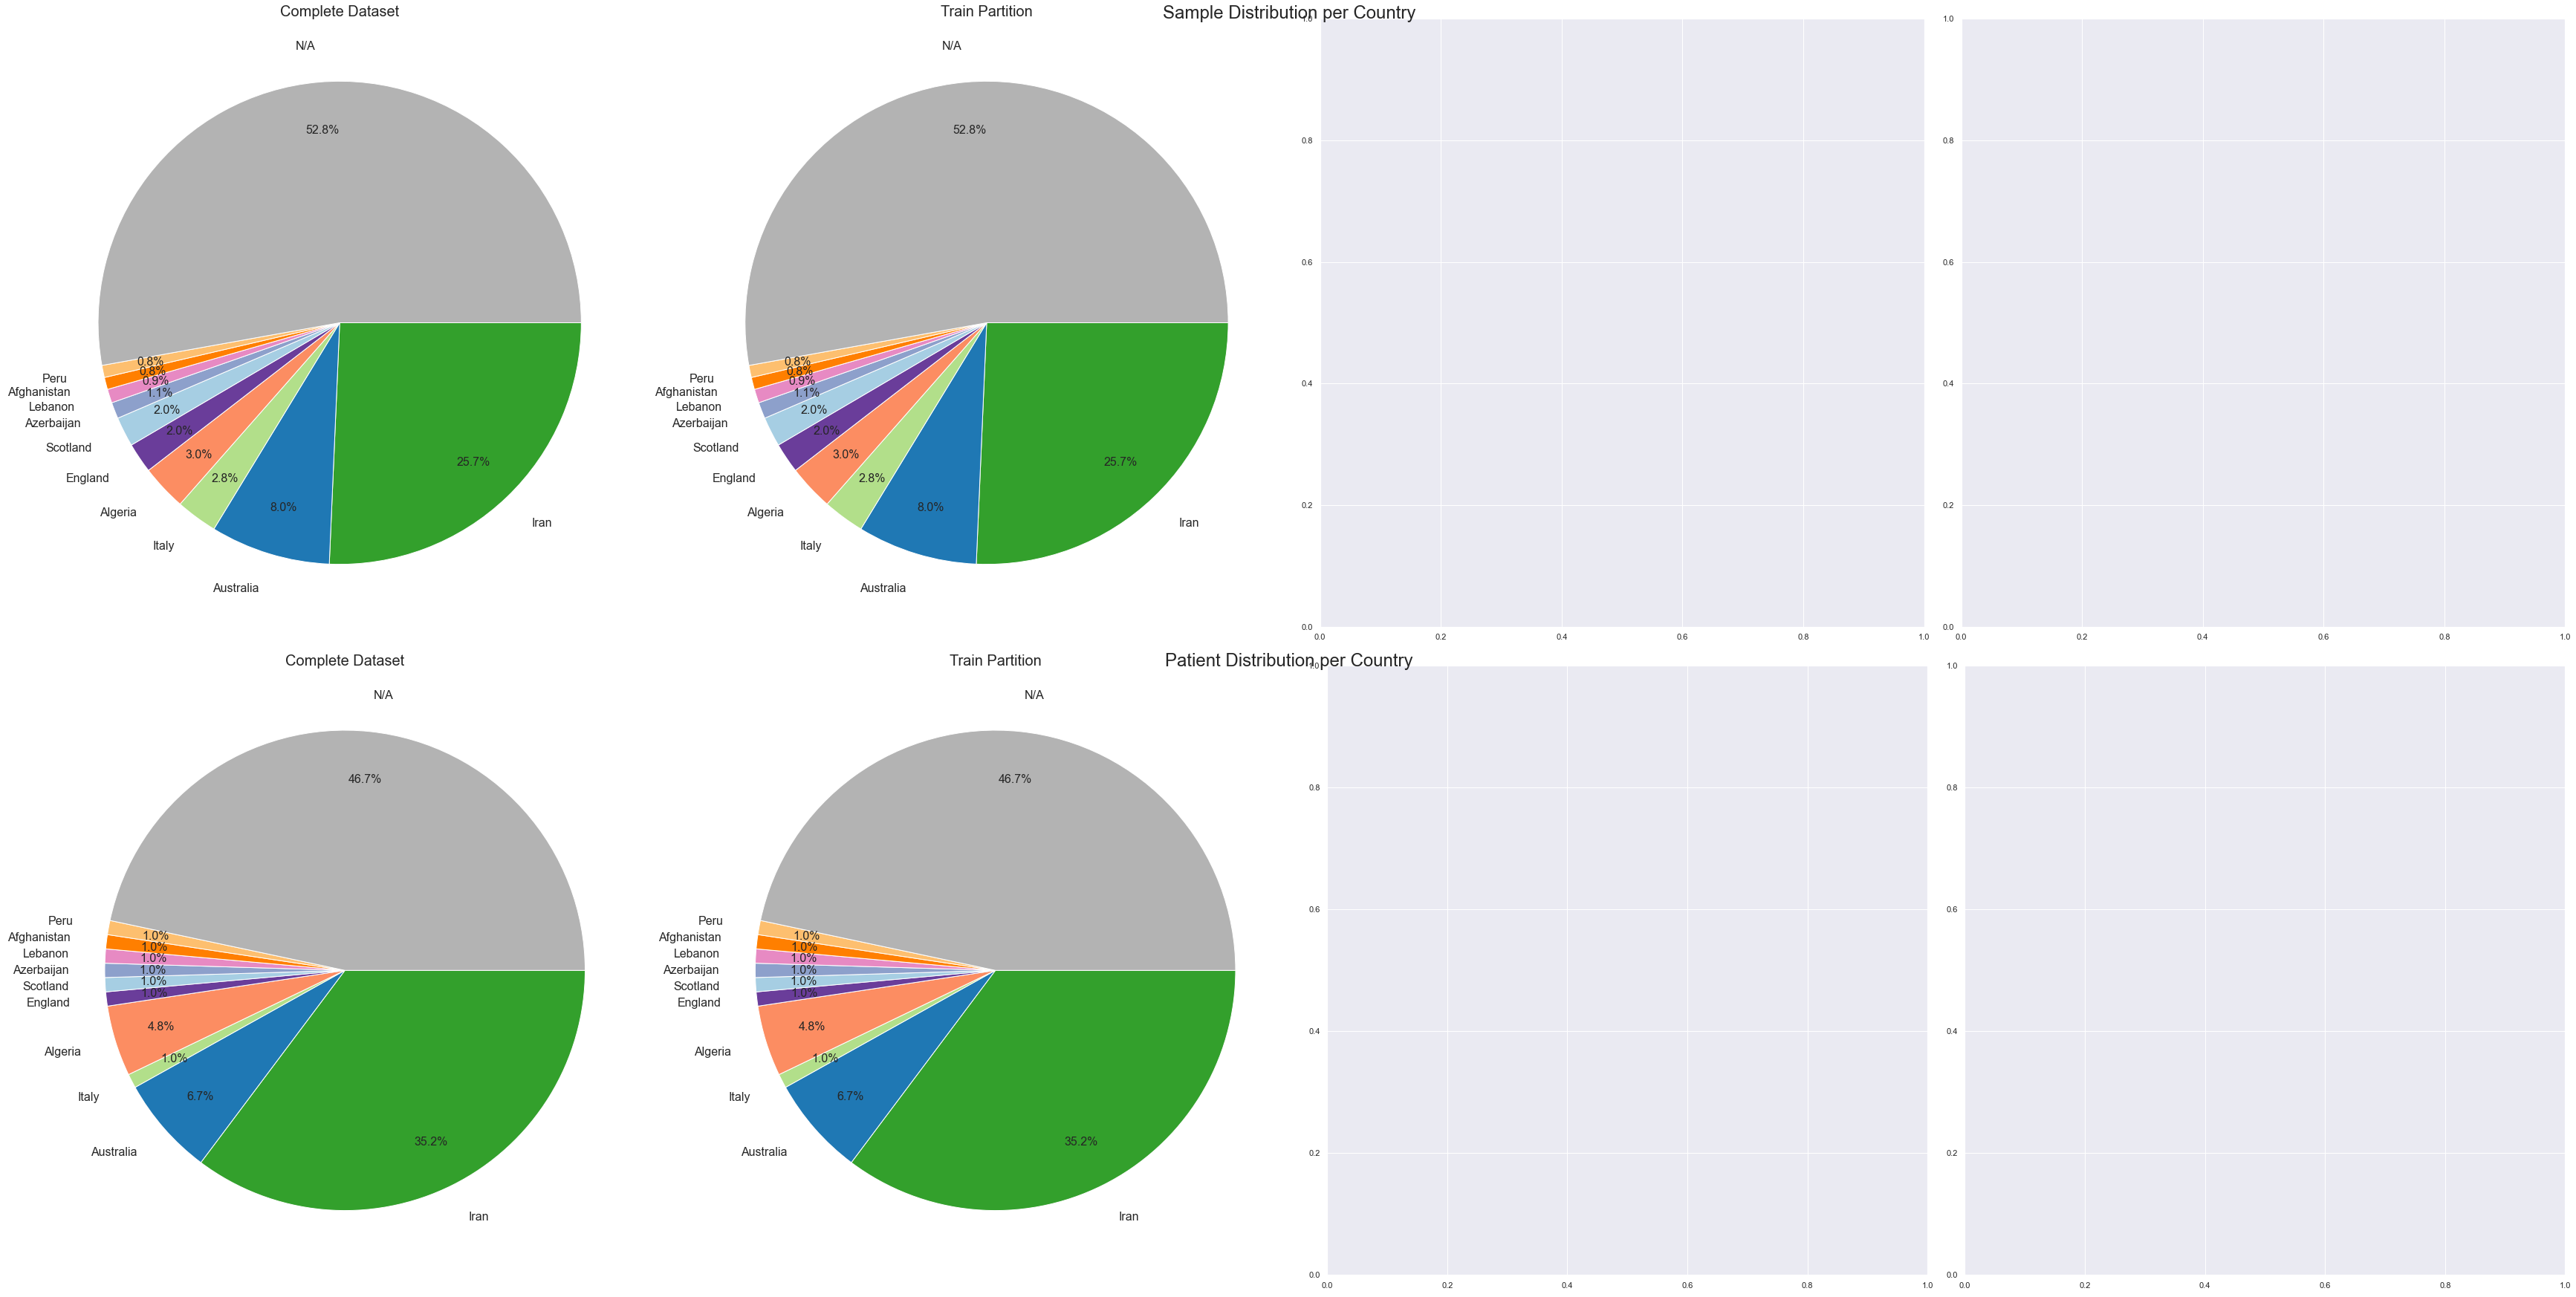

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,0,0,0,0
Iran,918,918,0,0
USA,0,0,0,0
N/A,1888,1888,0,0
Australia,287,287,0,0
Italy,99,99,0,0
Algeria,109,109,0,0
Belgium,0,0,0,0


## Partition

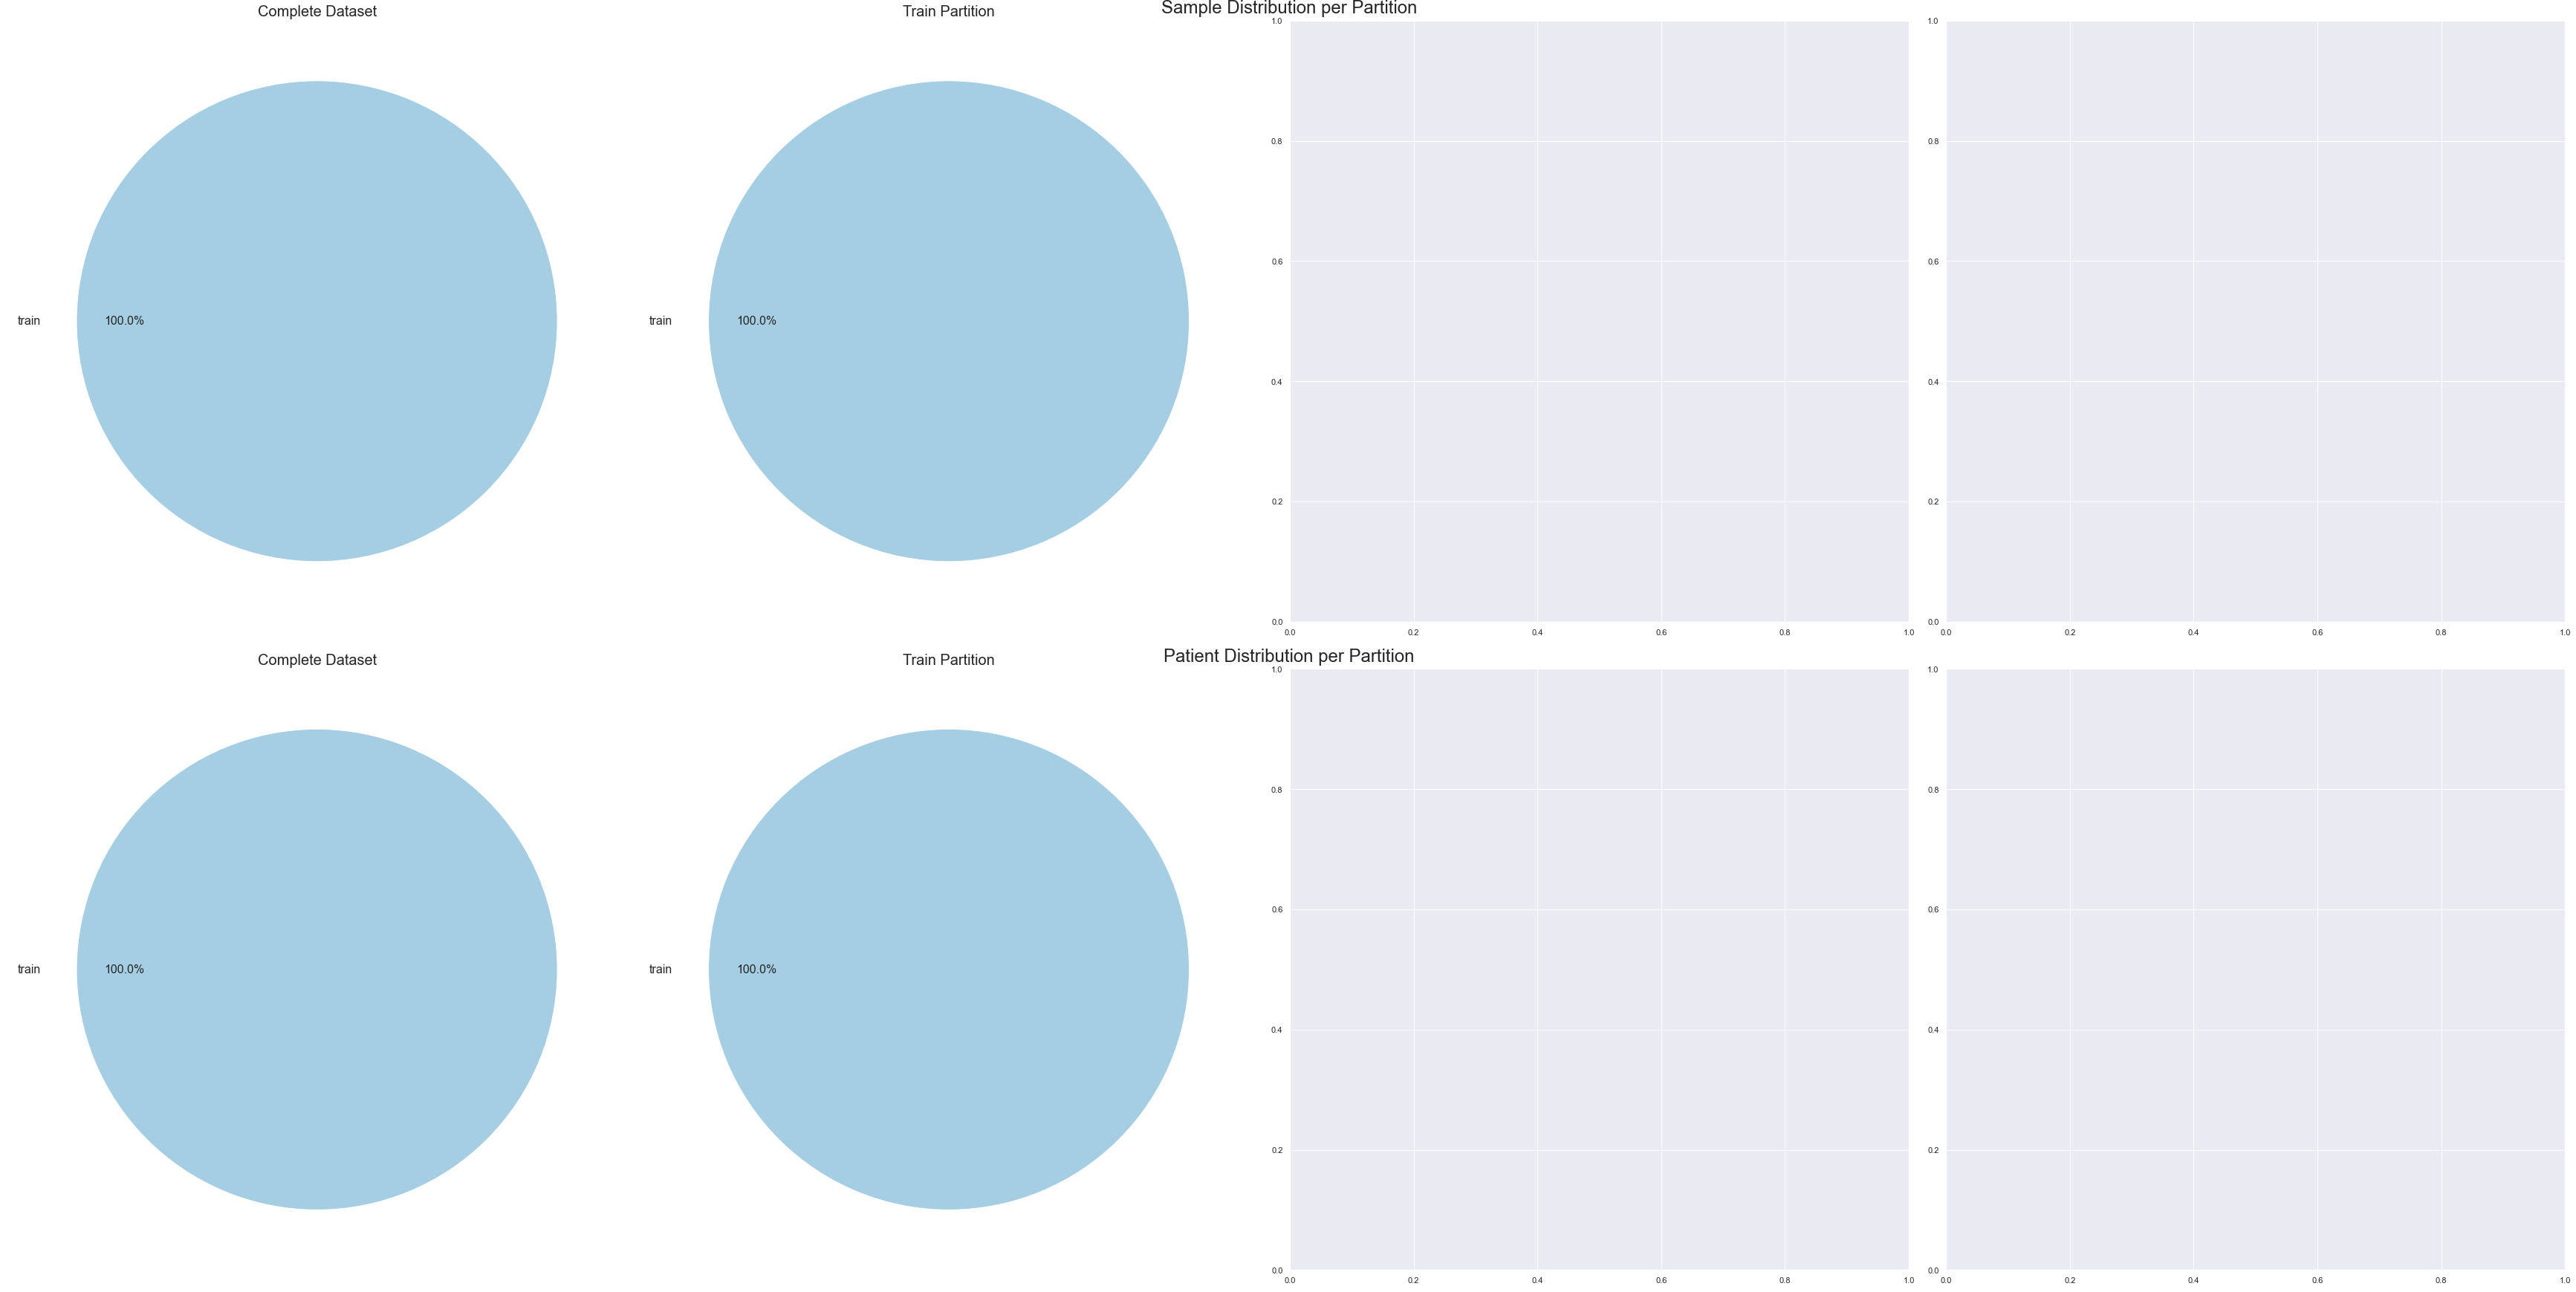

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
train,3574,3574,0,0
test,0,0,0,0
val,0,0,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
train,105,105,0,0
val,0,0,0,0
test,0,0,0,0


## Slice Selection

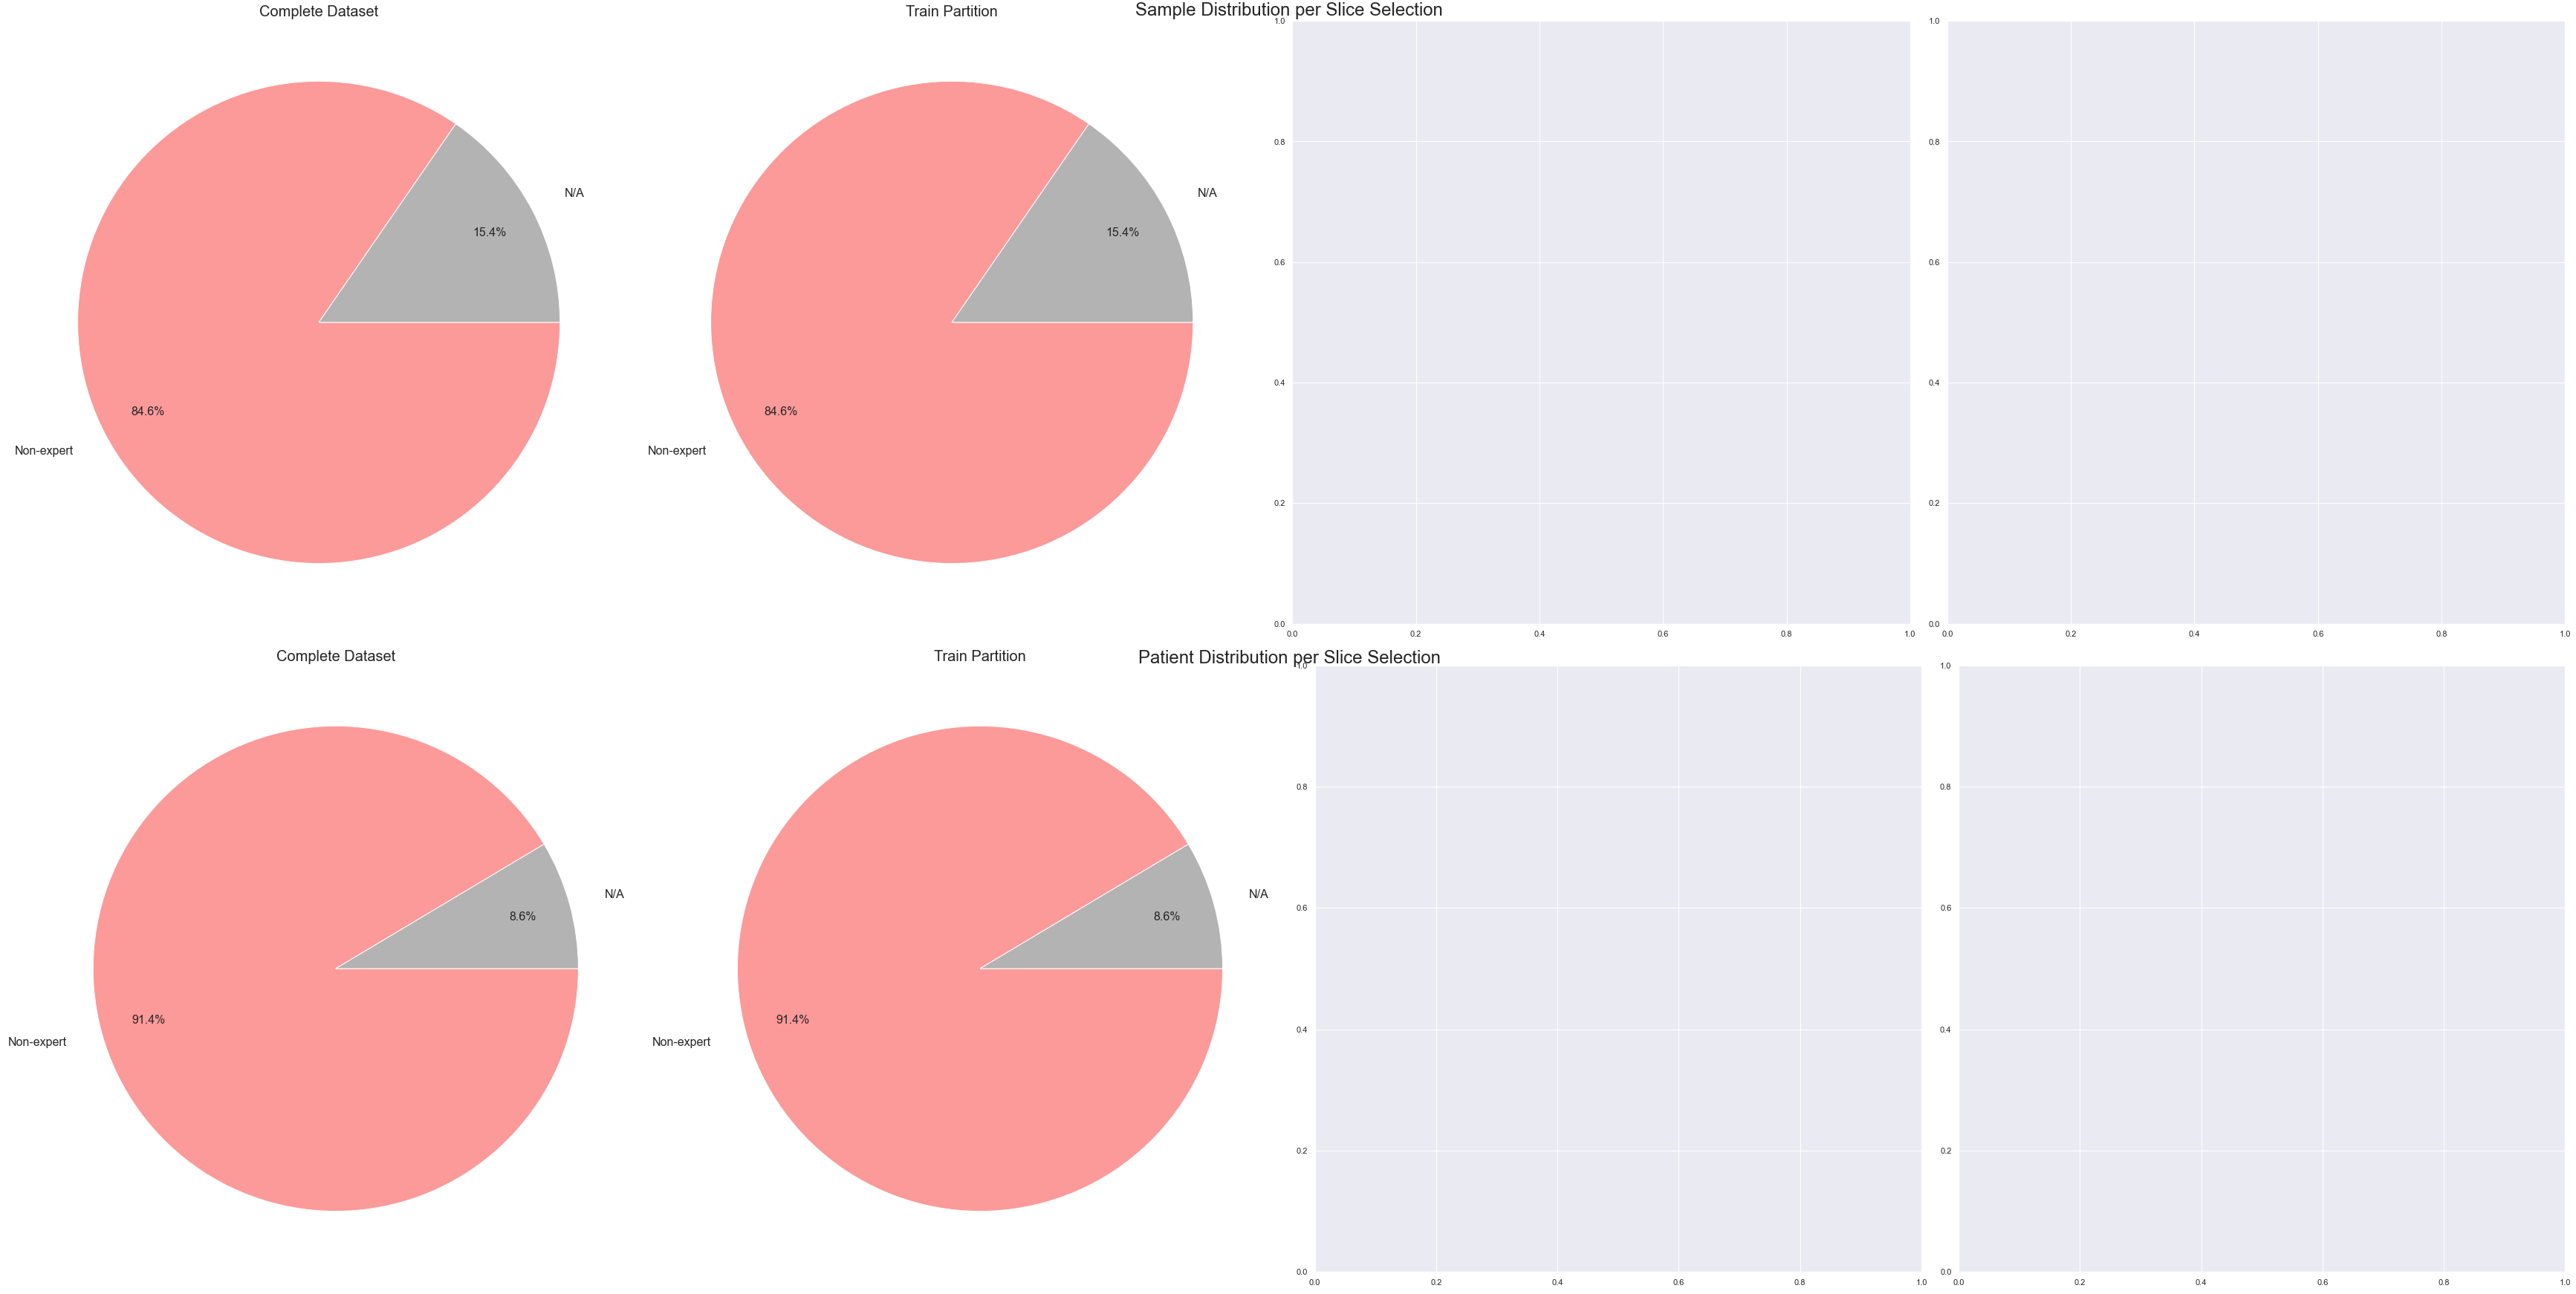

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,0,0,0,0
Expert,0,0,0,0
N/A,550,550,0,0
Non-expert,3024,3024,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
Automatic,0,0,0,0
Expert,0,0,0,0


# Data Split

In [21]:
new_samples_df, new_patient_df = split.radiopaedia_dataset_by_samples( samples_df, patient_df, dataset_name, sample_frac = 0.2, seed = 20 )

    1/3: Group ('N/A', 'Normal', 'N/A', 'N/A', 'N/A')
	[Test] Moved 107 samples (3 patients), expected 110 samples, had 550 samples (9 patients)...
		List of sample counts: [163, 55, 25, 77, 36, 88, 45, 27, 34]
	[Val] Moved 77 samples (1 patients), expected 110 samples, had 443 samples (6 patients)...
		List of sample counts: [163, 77, 36, 88, 45, 34]



    2/3: Group ('N/A', 'Pneumonia', 'Non-expert', 'N/A', 'N/A')
	[Test] Moved 255 samples (13 patients), expected 256 samples, had 1282 samples (38 patients)...
		List of sample counts: [26, 17, 11, 29, 11, 3, 36, 44, 28, 25, 79, 31, 59, 33, 9, 31, 4, 72, 25, 34, 27, 33, 40, 41, 77, 46, 41, 16, 12, 38, 99, 21, 19, 14, 25, 82, 39, 5]
	[Val] Moved 254 samples (7 patients), expected 256 samples, had 1027 samples (25 patients)...
		List of sample counts: [79, 31, 59, 33, 31, 72, 25, 34, 27, 33, 40, 41, 77, 46, 41, 16, 38, 99, 21, 19, 14, 25, 82, 39, 5]



    3/3: Group ('N/A', 'COVID-19', 'Non-expert', 'N/A', 'N/A')
	[Test] Moved 344 samp

# Post Split Plots

## Class

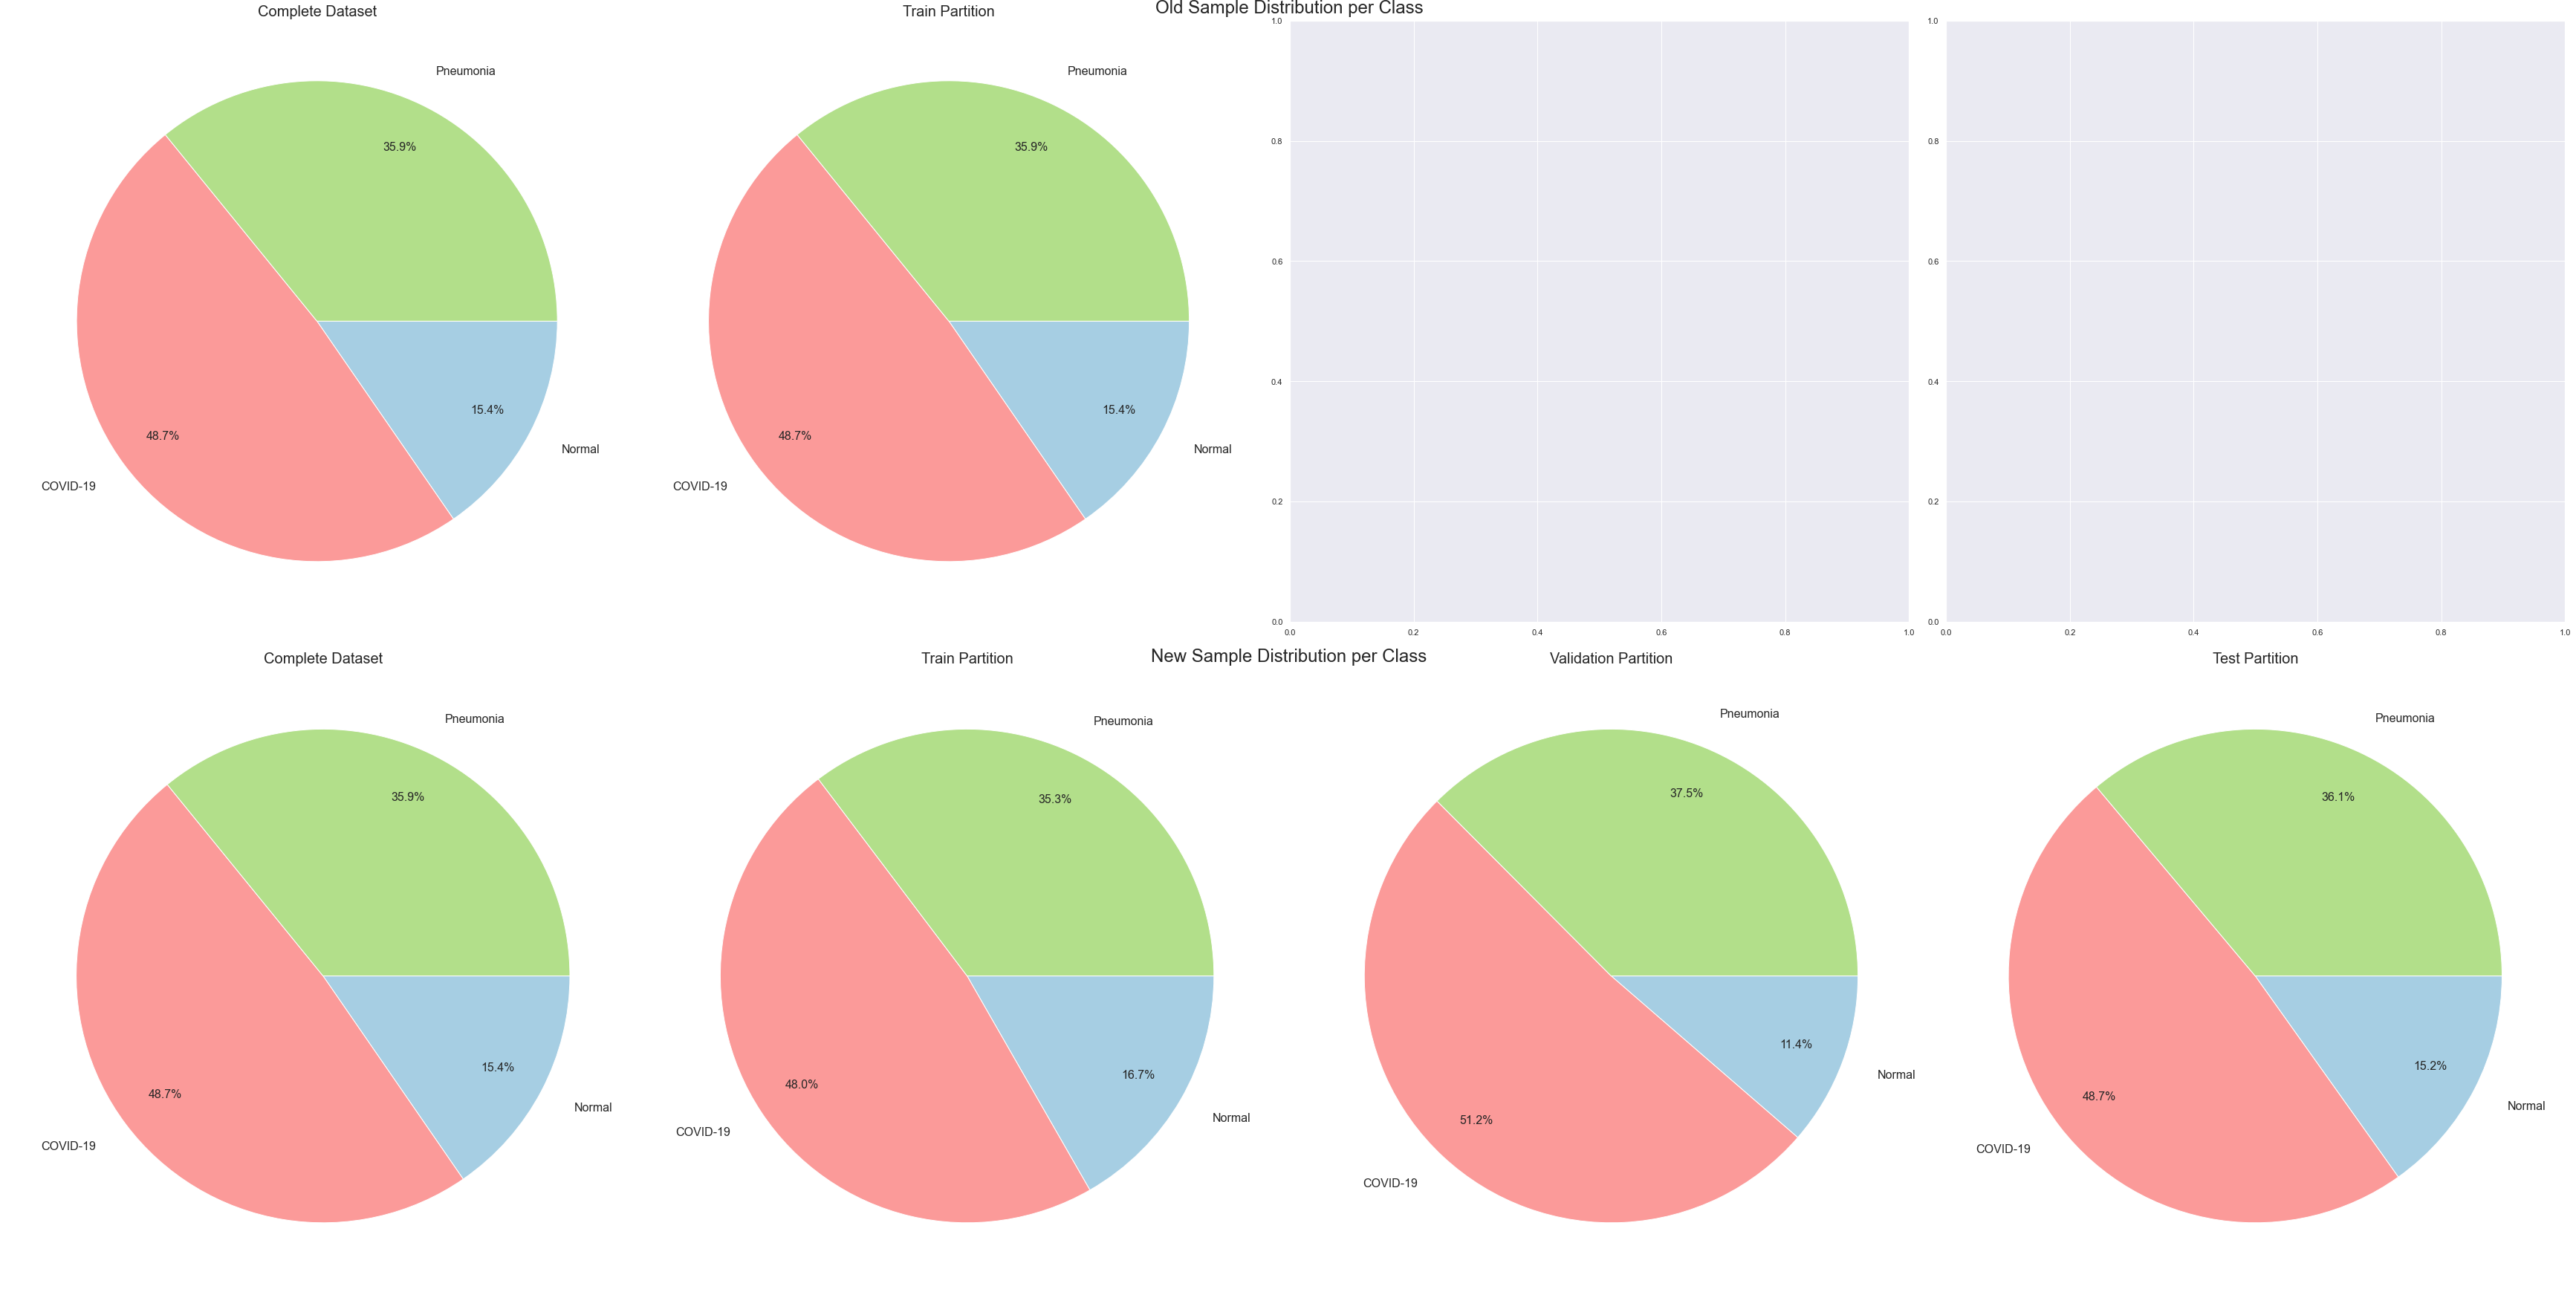

In [22]:
plot.column_as_pies( samples_df, new_samples_df, "class", dataset_name, figsize = (48, 24), resplit = True )

In [23]:
plot.column_as_table( samples_df, new_samples_df, "class", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,1742,1742,0,0
Normal,550,550,0,0
Pneumonia,1282,1282,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
COVID-19,1742,1051,347,344
Pneumonia,1282,773,254,255
Normal,550,366,77,107


## Age

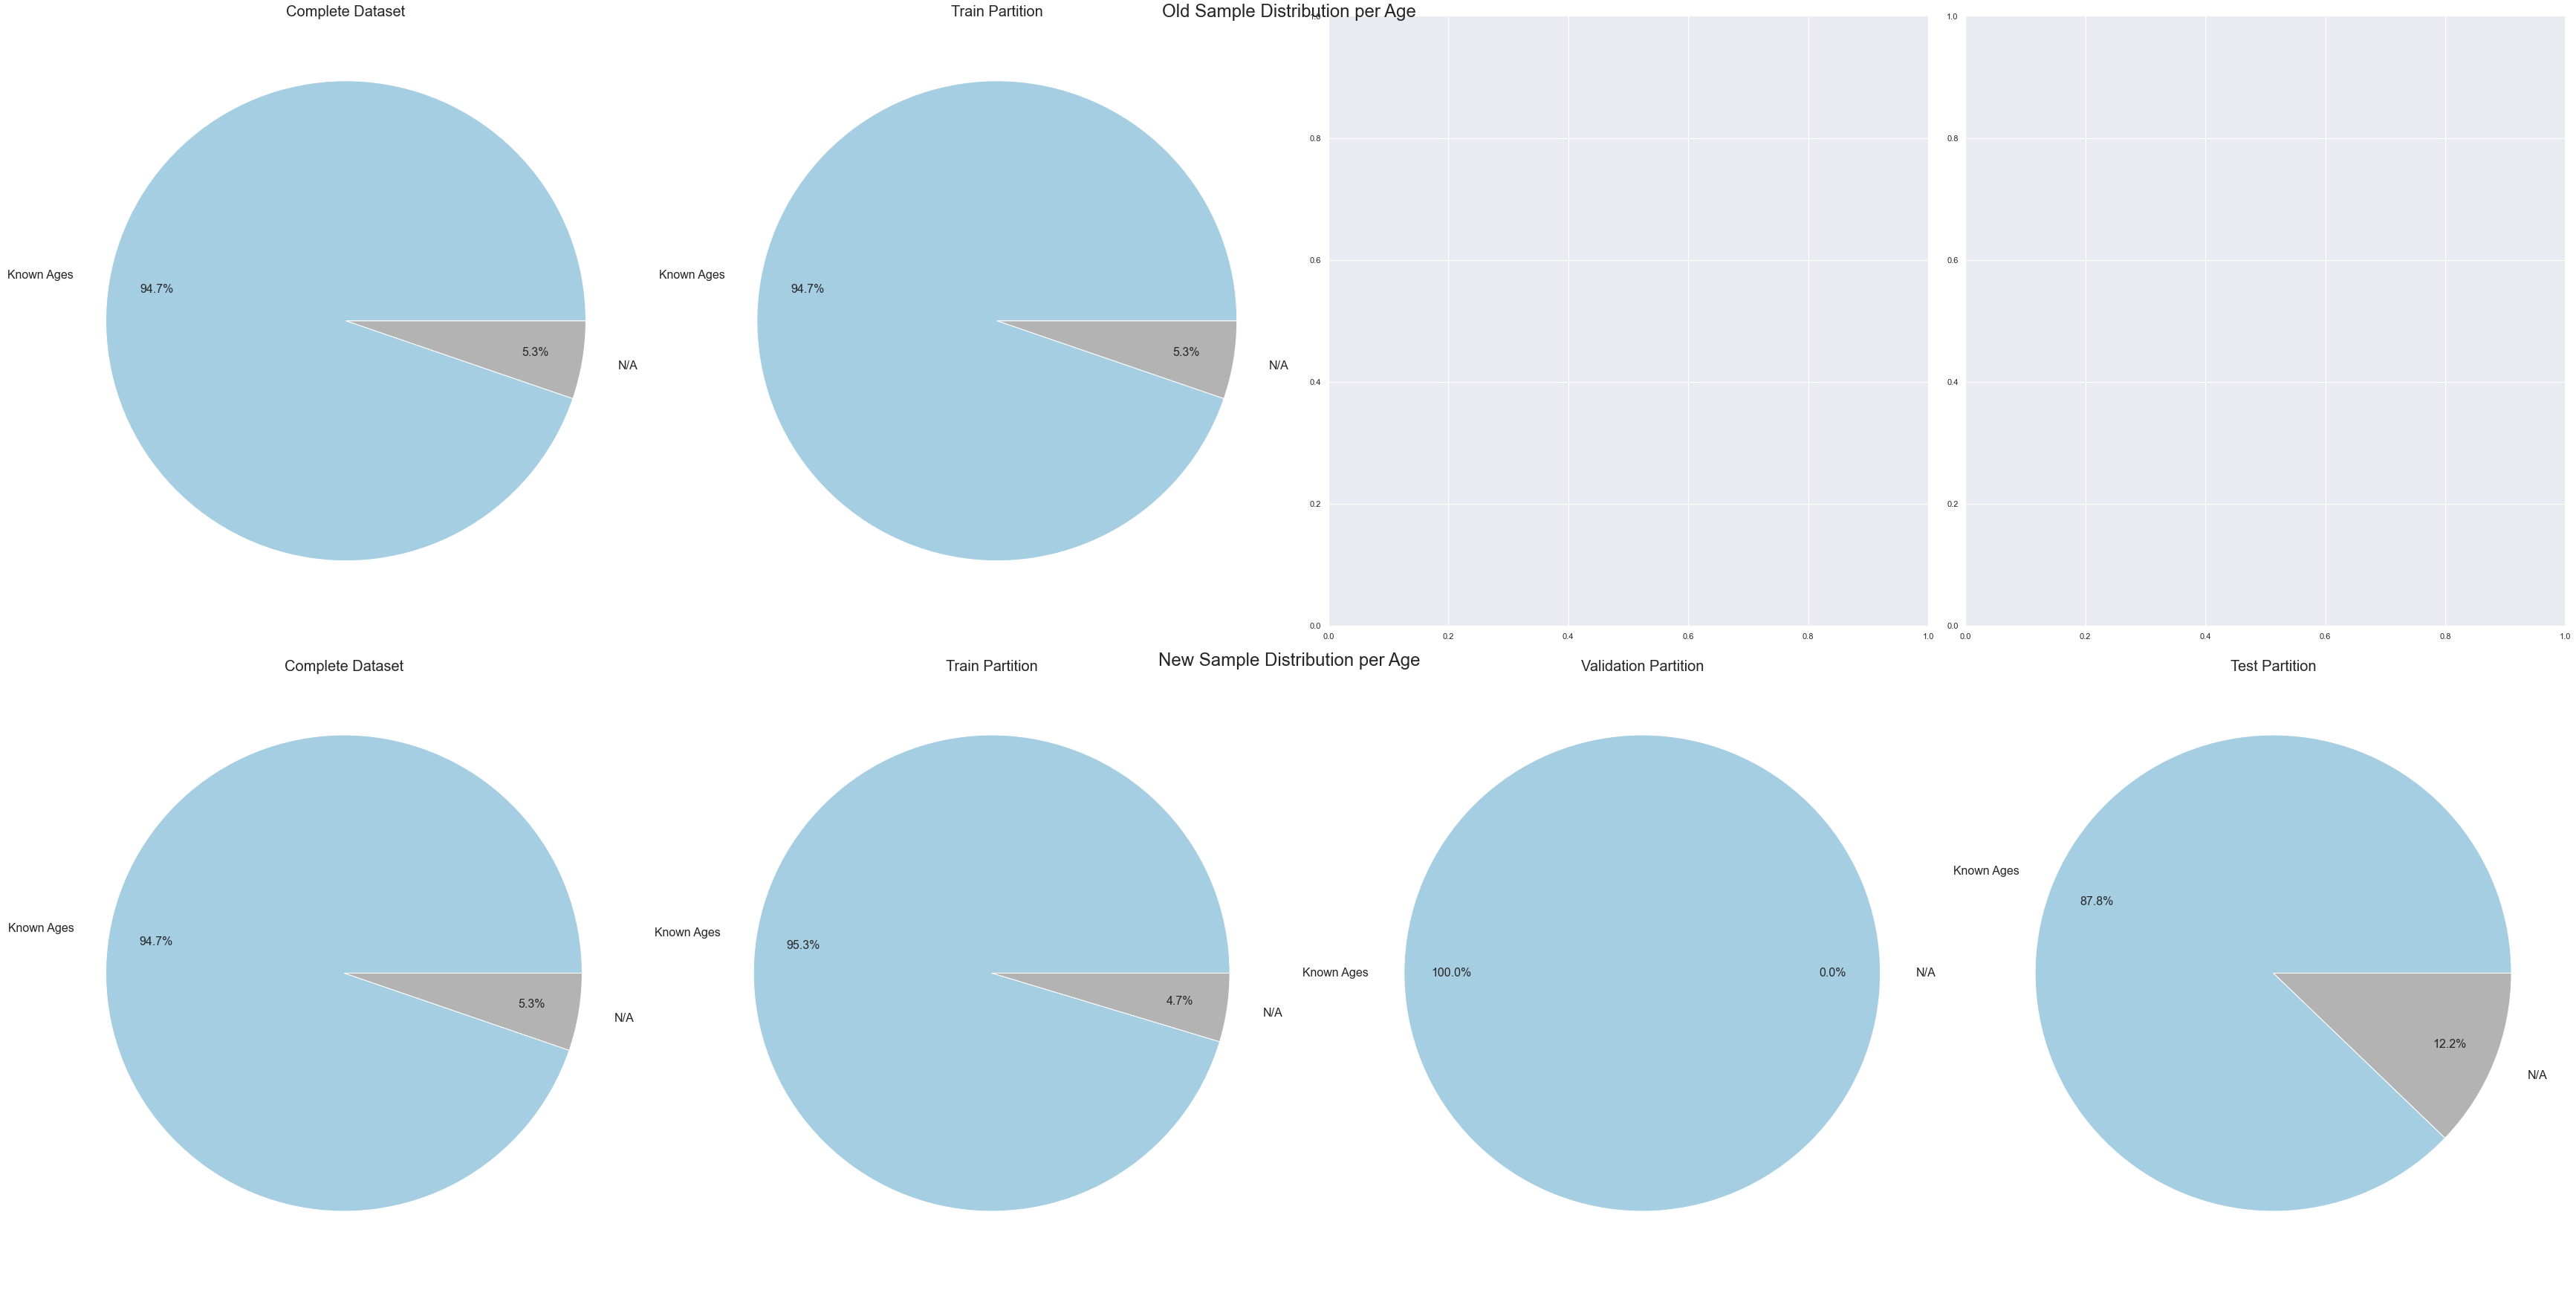

In [24]:
plot.column_as_pies( samples_df, new_samples_df, "age", dataset_name, figsize = (48, 24), resplit = True)

In [25]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
N/A,188,188,0,0
Known Ages,3386,3386,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,188,102,0,86
Known Ages,3386,2088,678,620
SUM,3574,2190,678,706


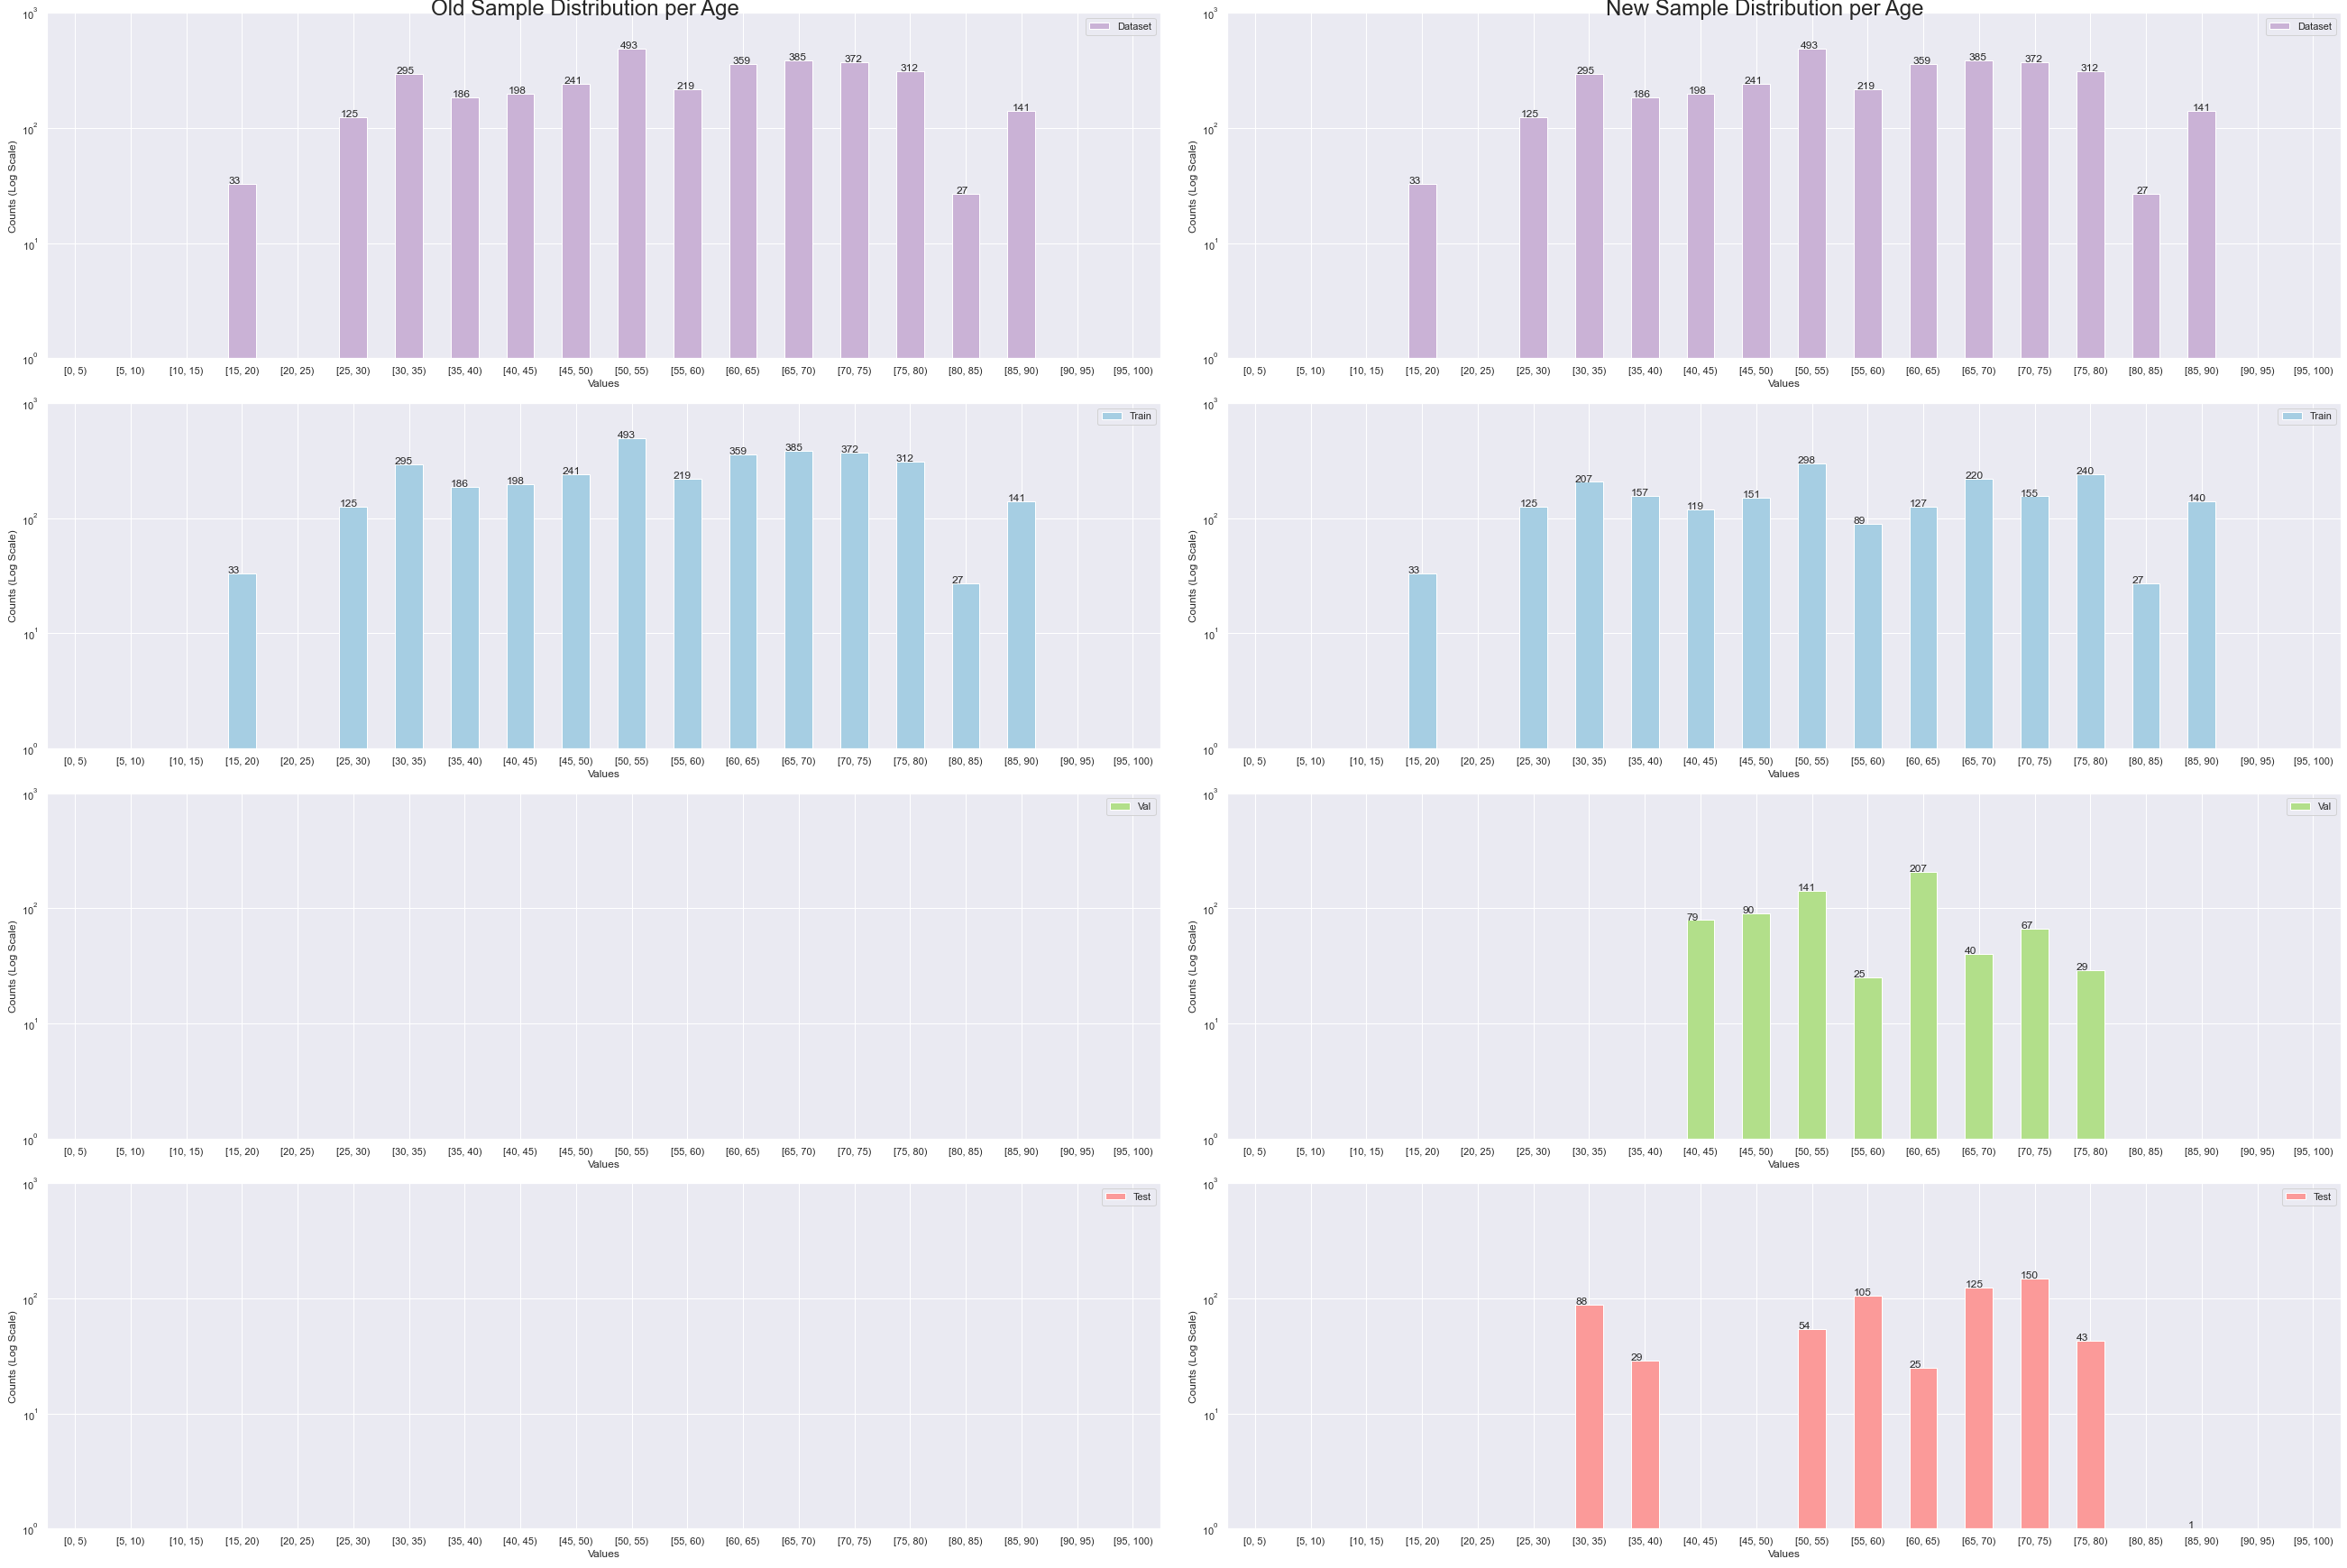

In [26]:
plot.column_as_histograms( samples_df, new_samples_df, "age", dataset_name, figsize = (36, 24), resplit = True)

In [27]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = True, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",0,0,0,0
"[10, 15)",0,0,0,0
"[15, 20)",33,33,0,0
"[20, 25)",0,0,0,0
"[25, 30)",125,125,0,0
"[30, 35)",295,295,0,0
"[35, 40)",186,186,0,0
"[40, 45)",198,198,0,0


## Sex

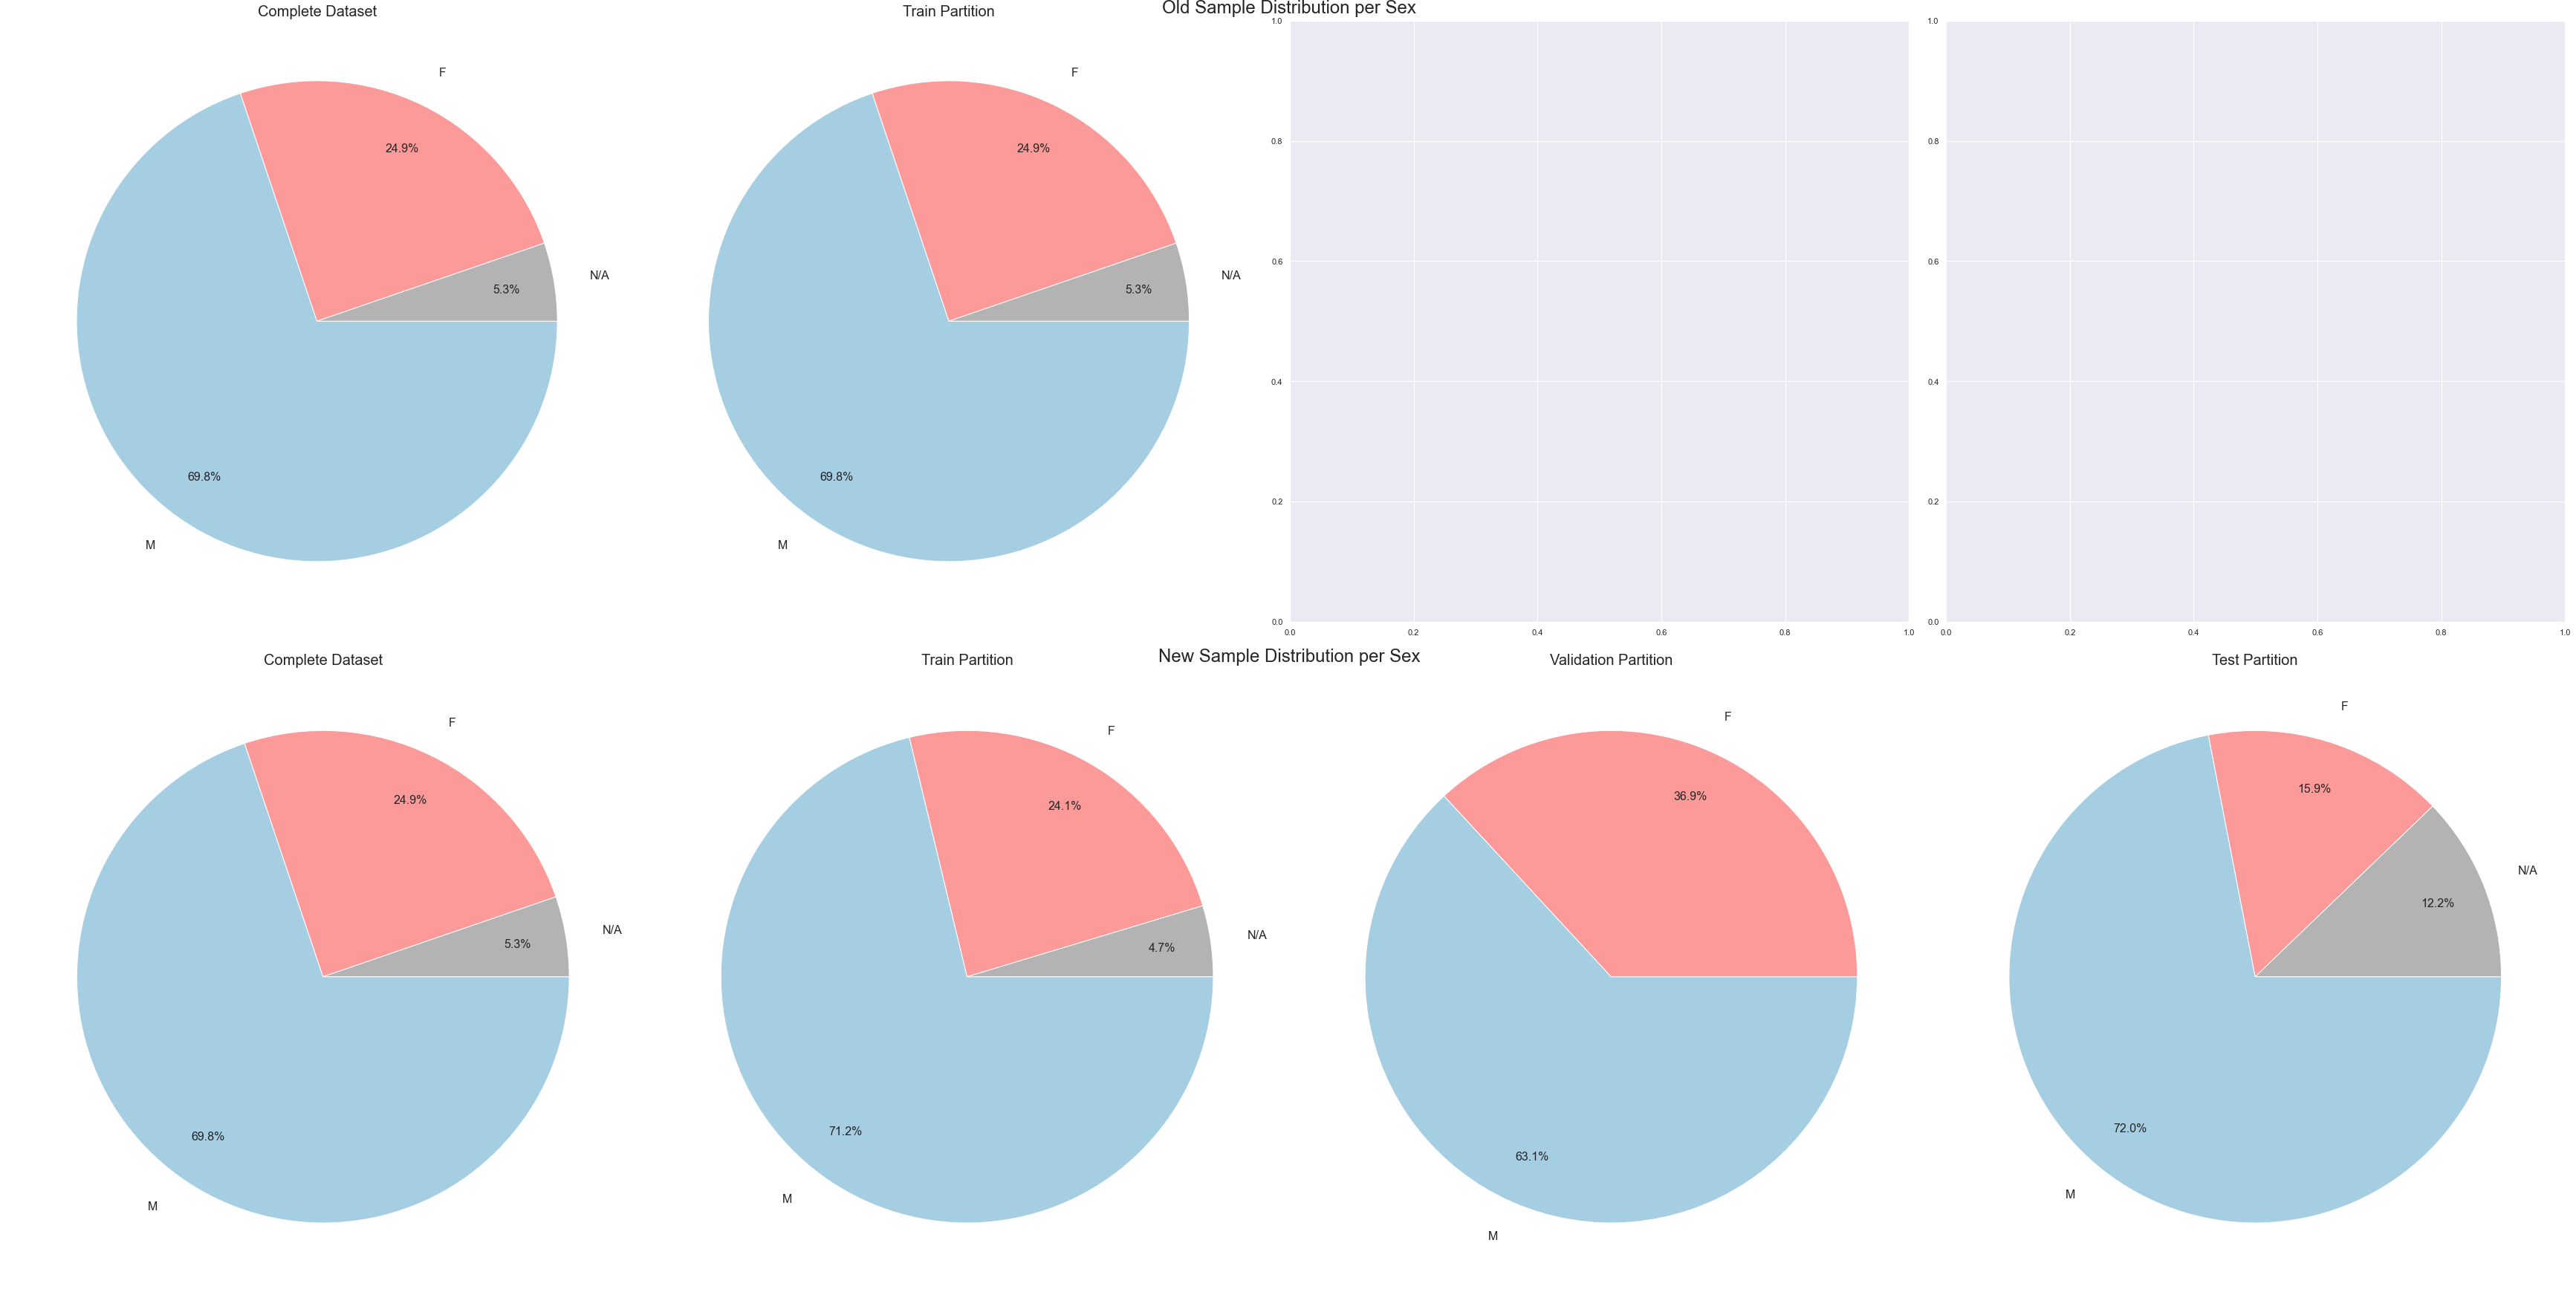

In [28]:
plot.column_as_pies( samples_df, new_samples_df, "sex", dataset_name, figsize = (48, 24), resplit = True )

In [29]:
plot.column_as_table( samples_df, new_samples_df, "sex", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
M,2496,2496,0,0
N/A,188,188,0,0
F,890,890,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
M,2496,1560,428,508
F,890,528,250,112
N/A,188,102,0,86


## Country

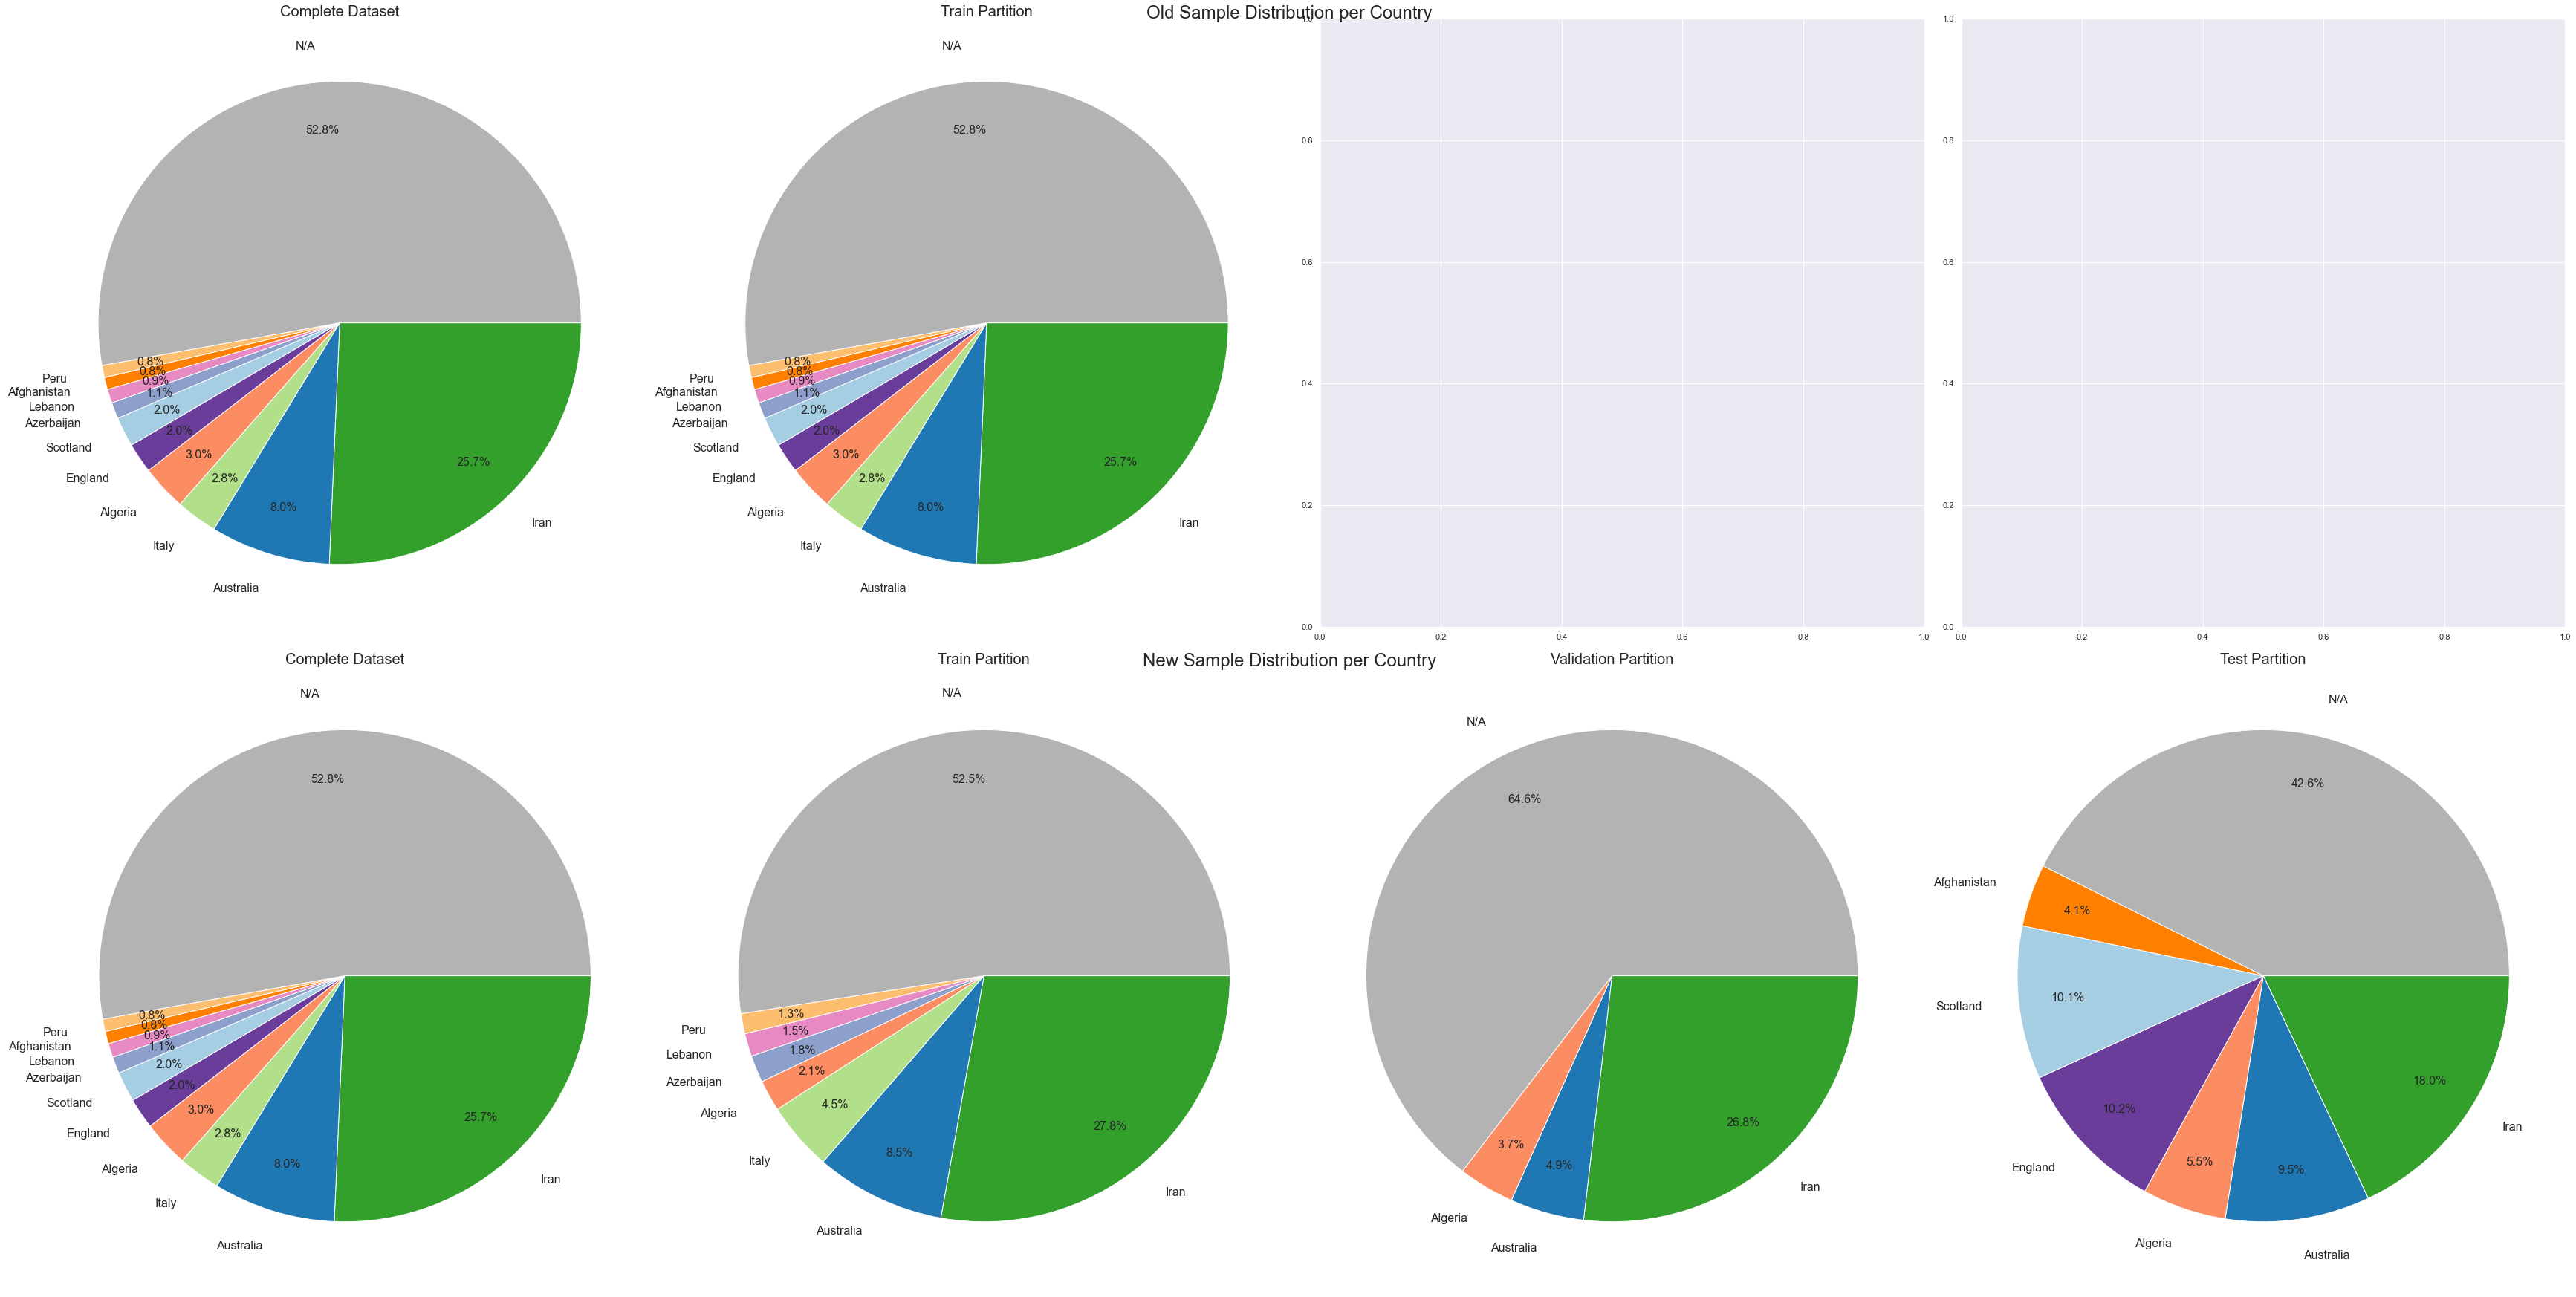

In [30]:
plot.column_as_pies( samples_df, new_samples_df, "country", dataset_name, figsize = (48, 24), resplit = True )

In [31]:
plot.column_as_table( samples_df, new_samples_df, "country", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,0,0,0,0
Iran,918,918,0,0
USA,0,0,0,0
N/A,1888,1888,0,0
Australia,287,287,0,0
Italy,99,99,0,0
Algeria,109,109,0,0
Belgium,0,0,0,0


## Partition

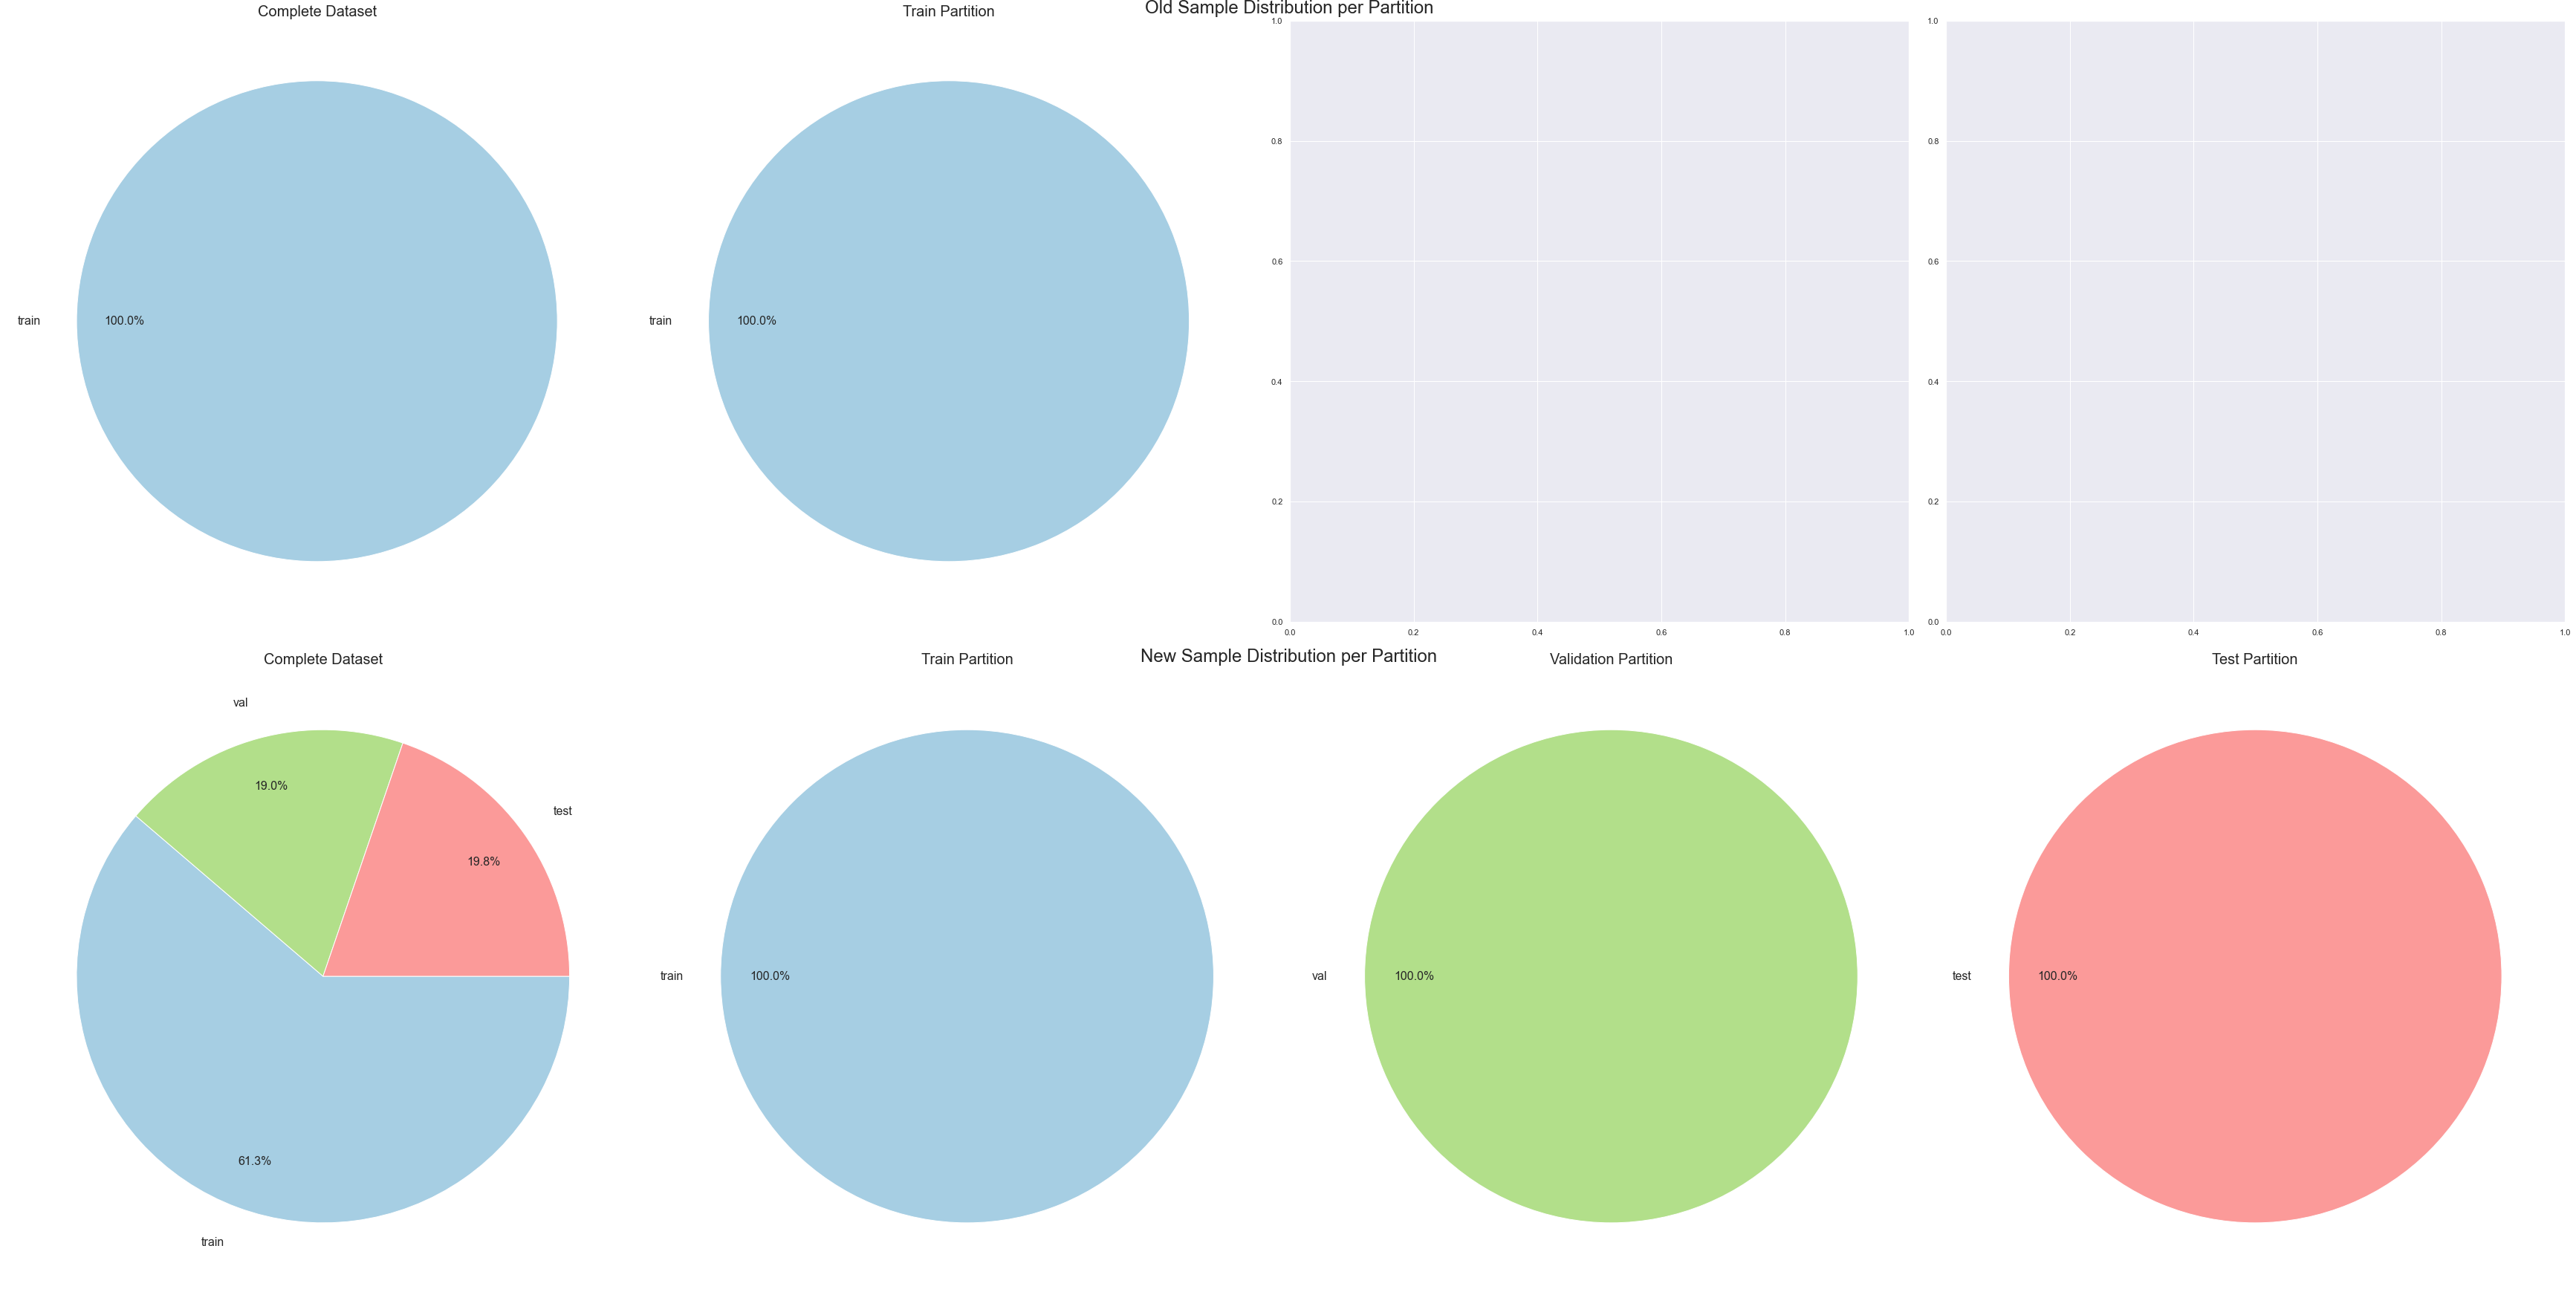

In [32]:
plot.column_as_pies( samples_df, new_samples_df, "partition", dataset_name, figsize = (48, 24), resplit = True )

In [33]:
plot.column_as_table( samples_df, new_samples_df, "partition", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
train,3574,3574,0,0
test,0,0,0,0
val,0,0,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
train,2190,2190,0,0
test,706,0,0,706
val,678,0,678,0


## Slice Selection

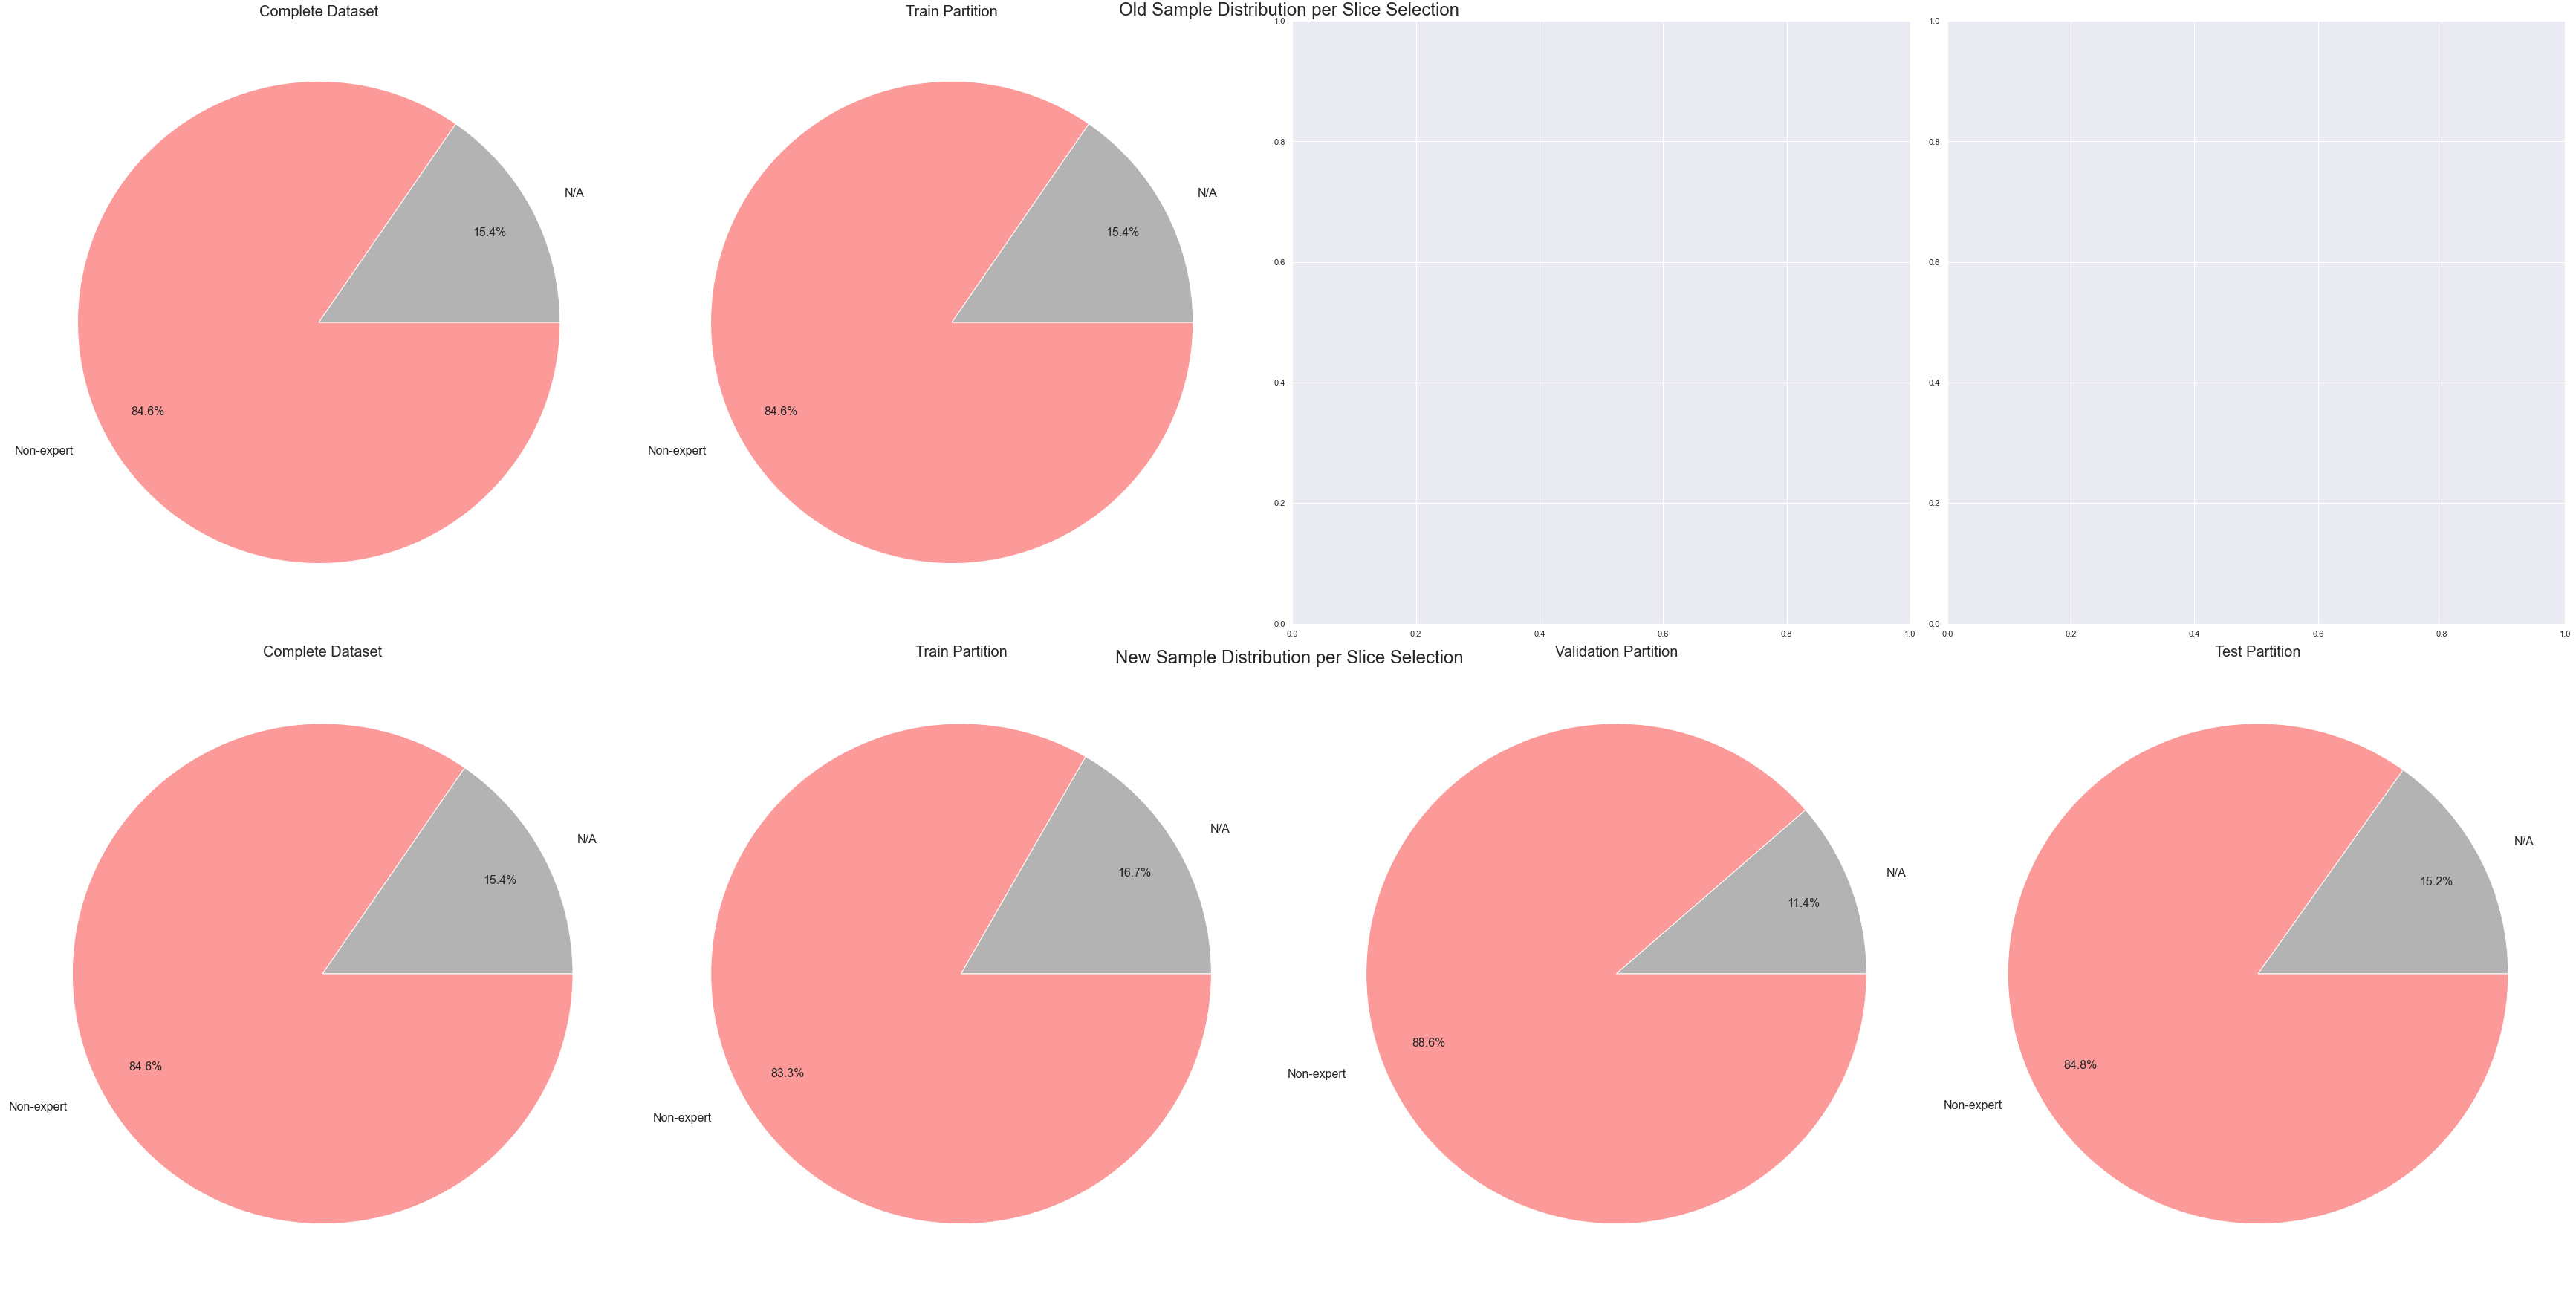

In [34]:
plot.column_as_pies( samples_df, new_samples_df, "slice_selection", dataset_name, figsize = (48, 24), resplit = True )

In [35]:
plot.column_as_table( samples_df, new_samples_df, "slice_selection", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
Automatic,0,0,0,0
Expert,0,0,0,0
N/A,550,550,0,0
Non-expert,3024,3024,0,0
SUM,3574,3574,0,0
,Dataset,Train,Val,Test
Values,,,,
Non-expert,3024,1824,601,599
N/A,550,366,77,107


# Registering Changes

In [36]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, new_samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(new_samples_df) )
updated_df.head()

119411 3574


,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT
